# Introduction



In [2]:
!nvidia-smi

/bin/bash: nvidia-smi: command not found


In [2]:
import os
HOME = os.getcwd()
print(HOME)

/content


Installation of yolov8

In [4]:
# Pip install method (recommended)

!pip install ultralytics==8.0.20

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.0.1+cu118 CPU
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 23.3/107.7 GB disk)


In [5]:
from ultralytics import YOLO

from IPython.display import display, Image

CLI Basics 

If you want to train, validate or run inference on models and don't need to make any modifications to the code, using YOLO command line interface is the easiest way to get started. Read more about CLI in [Ultralytics YOLO Docs](https://docs.ultralytics.com/usage/cli/).

```
yolo task=detect    mode=train    model=yolov8n.yaml      args...
          classify       predict        yolov8n-cls.yaml  args...
          segment        val            yolov8n-seg.yaml  args...
                         export         yolov8n.pt        format=onnx  args...
```

 💻 CLI

`yolo mode=predict` runs YOLOv8 inference on a variety of sources, downloading models automatically from the latest YOLOv8 release, and saving results to `runs/predict`.

In [3]:
%cd {HOME}
!yolo task=detect mode=predict model=yolov8n.pt conf=0.25 source='https://public.roboflow.com/ds/7mhemItKyZ?key=Jx0MrFfU50' save=True

/content
2023-06-09 07:07:24.078659: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-06-09 07:07:25.350657: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.0.1+cu118 CPU
YOLOv8n summary (fused): 168 layers, 3151904 parameters, 0 gradients, 8.7 GFLOPs
qt.qpa.xcb: could not connect to display 
qt.qpa.plugin: Could not load the Qt platform plugin "xcb" in "/usr/local/lib/python3.10/dist-packages/cv2/qt/plugins" even though it was found.
This application failed to start because no Qt platform plugin could be initialized. Reinstalling the application may fix this problem.

Available platform plugins are: xcb.



Exporting the "hard hat workers dataset"

In [4]:
!mkdir {HOME}/datasets
%cd {HOME}/datasets

!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="Aba34X8JwmnJK3BAC1iG")
project = rf.workspace("joseph-nelson").project("hard-hat-workers")
dataset = project.version(2).download("yolov8")

mkdir: cannot create directory ‘/content/datasets’: File exists
/content/datasets
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
loading Roboflow workspace...
loading Roboflow project...


Extracting Dataset Version Zip to Hard-Hat-Workers-2 in yolov8:: 100%|██████████| 14079/14079 [00:04<00:00, 2946.81it/s]


# First Model Evaluation (YOLO V8s)

## Hyperparameter Version 1


### Custom Training

The dataset does not have a validation setbut the data.yaml has a path with /valid in it. And so, in the datasets/Hard-Hat-Workers-2/data.yml file, I changed the valid directory to be the train one and so instead of /valid/images, it will be /train/images.

In [ ]:
%cd {HOME}

!yolo task=detect mode=train model=yolov8s.pt data={dataset.location}/data.yaml epochs=5 imgsz=800 plots=True

/content
Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
yolo/engine/trainer: task=detect, mode=train, model=yolov8s.yaml, data=/content/datasets/Hard-Hat-Workers-2/data.yaml, epochs=5, patience=50, batch=16, imgsz=800, save=True, cache=False, device=, workers=8, project=None, name=None, exist_ok=False, pretrained=False, optimizer=SGD, verbose=True, seed=0, deterministic=True, single_cls=False, image_weights=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, overlap_mask=True, mask_ratio=4, dropout=False, val=True, save_json=False, save_hybrid=False, conf=0.001, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=ultralytics/assets/, show=False, save_txt=False, save_conf=False, save_crop=False, hide_labels=False, hide_conf=False, vid_stride=1, line_thickness=3, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format=torchscript, keras=False, optimize=False, int8=False, dynam

In [ ]:
!ls {HOME}/runs/detect/train5/

args.yaml					     train_batch1.jpg
confusion_matrix.png				     train_batch2.jpg
events.out.tfevents.1686251449.2a9d355272df.22954.0  val_batch0_labels.jpg
F1_curve.png					     val_batch0_pred.jpg
P_curve.png					     val_batch1_labels.jpg
PR_curve.png					     val_batch1_pred.jpg
R_curve.png					     val_batch2_labels.jpg
results.csv					     val_batch2_pred.jpg
results.png					     weights
train_batch0.jpg


/content


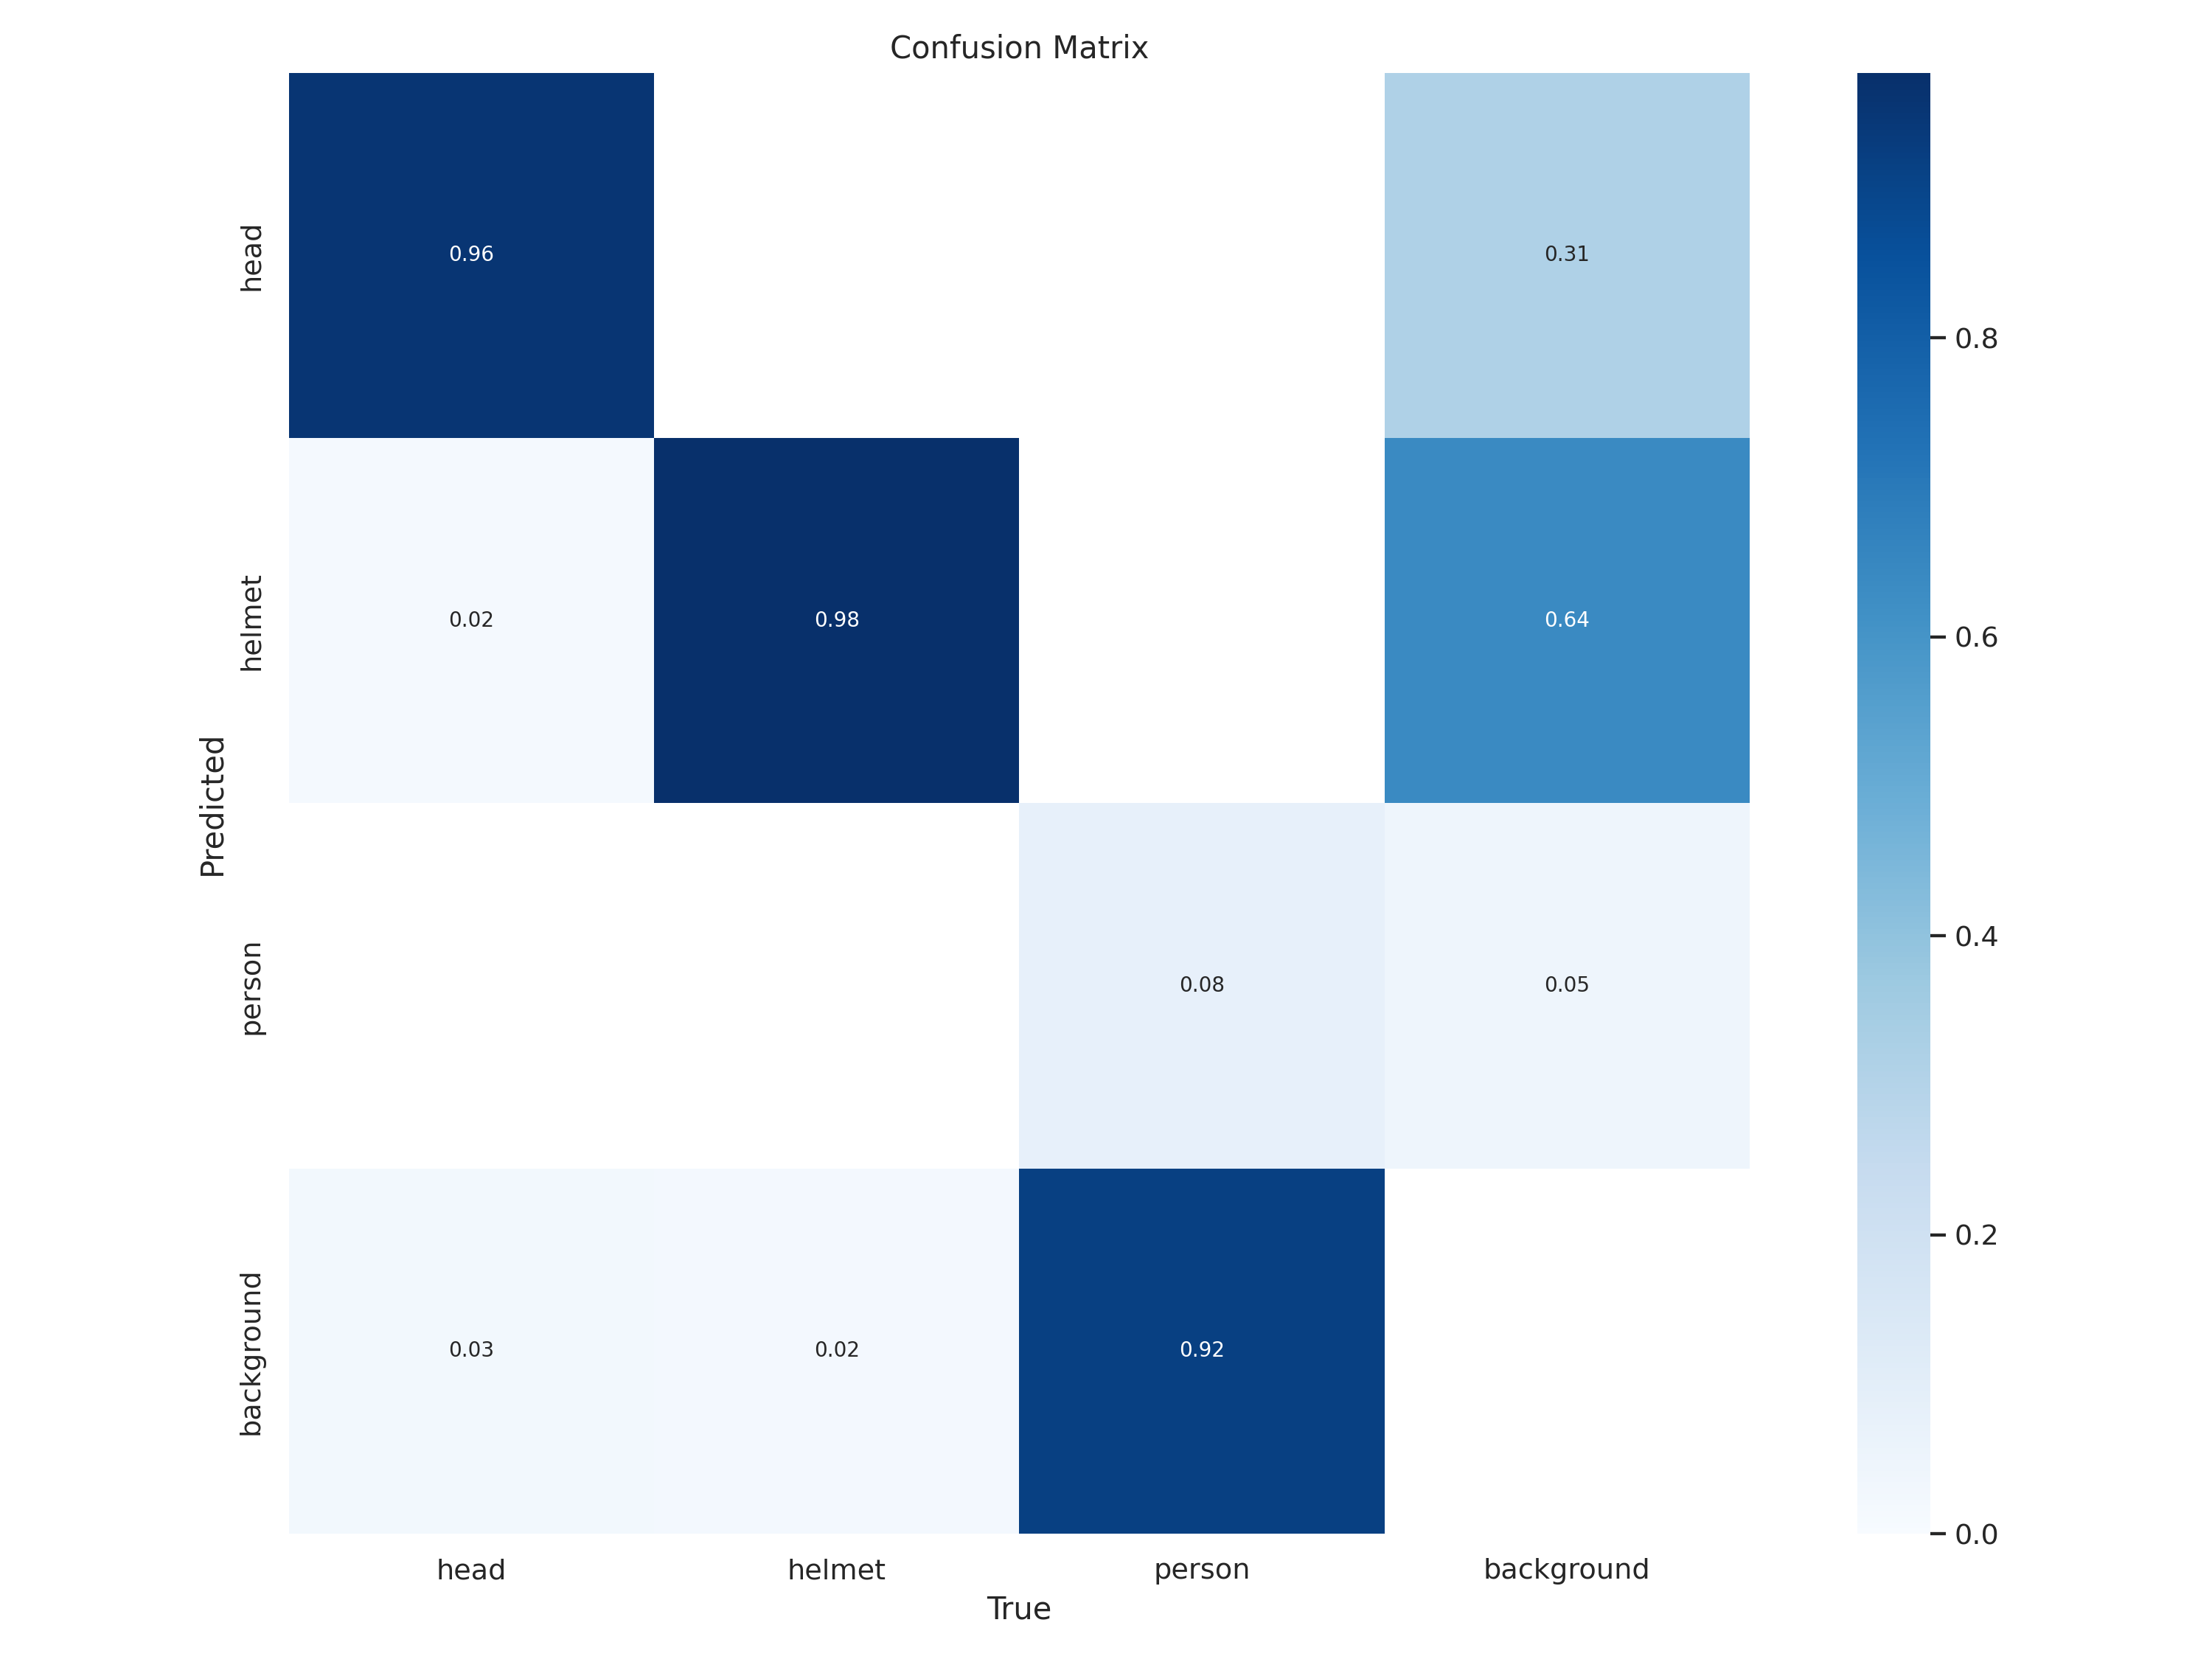

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train5/confusion_matrix.png', width=600)

In [ ]:
### saving the image of the matrix so that I dont have to run the model again.
import matplotlib.pyplot as plt
%cd {HOME}
# Save the image
plt.savefig(f'{HOME}/runs/detect/train5/confusion_matrix.png')


/content


<Figure size 640x480 with 0 Axes>

/content


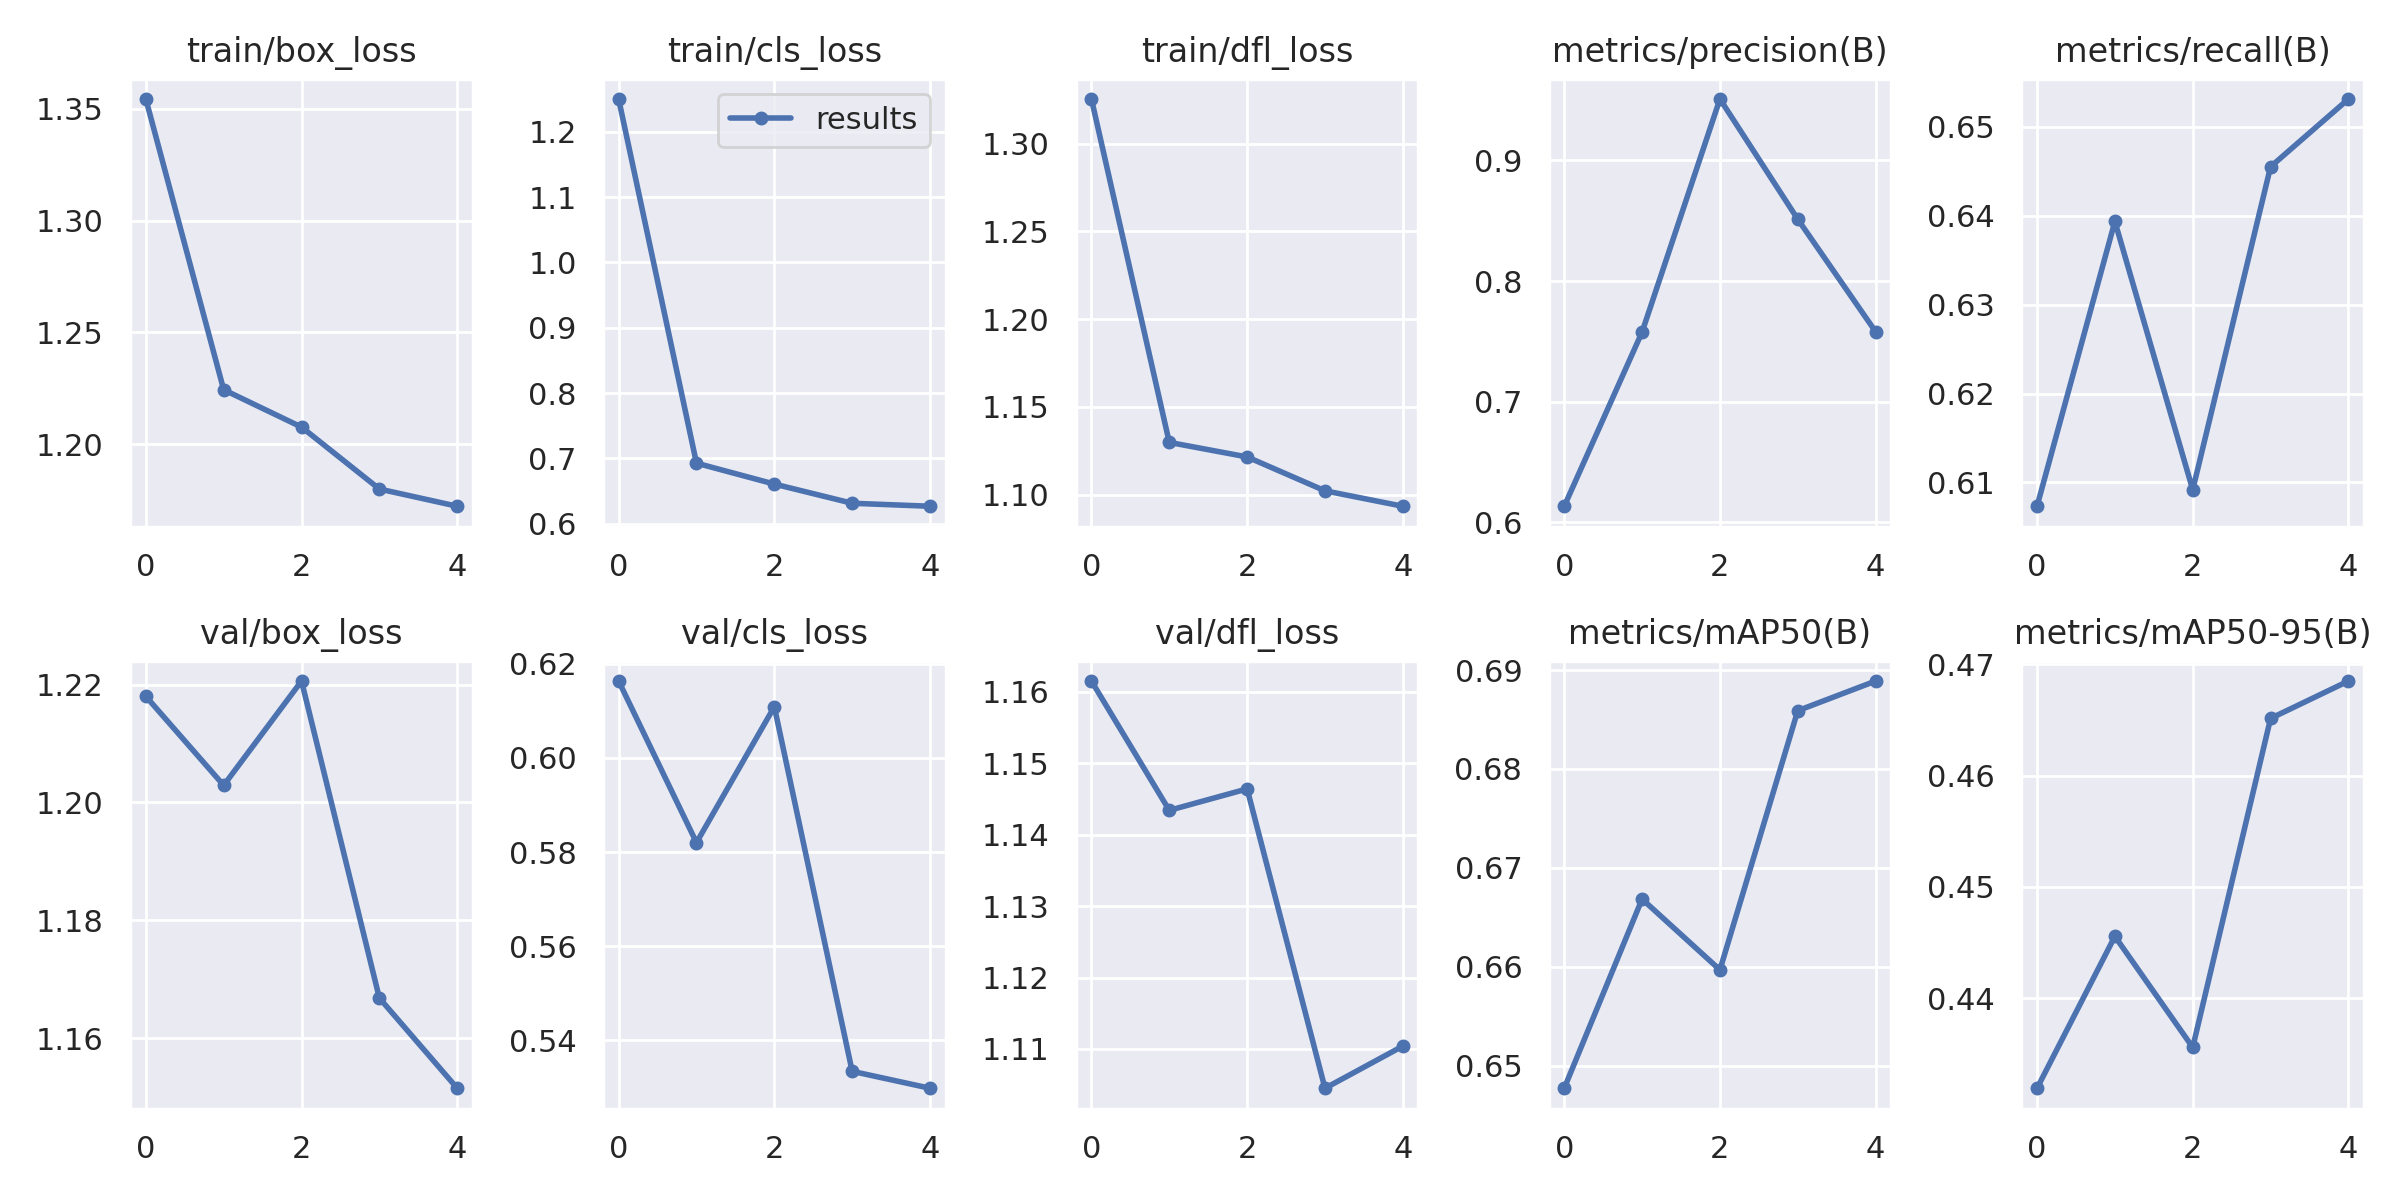

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train5/results.png', width=600)

In [ ]:
### saving the results so I do not have to run the model again
from PIL import Image
import os

# Set the current working directory
os.chdir(HOME)

# Define the image path
image_path = f'{HOME}/runs/detect/train5/results.png'

# Open the image
image = Image.open(image_path)

# Save the image
image.save(image_path)



In [ ]:
from PIL import Image
from IPython.display import display
import os

# Set the current working directory
os.chdir(HOME)

# Define the image path
image_path = f'{HOME}/runs/detect/train5/val_batch0_pred.jpg'

# Open the image
image = Image.open(image_path)

# Display the image
display(image)


Output hidden; open in https://colab.research.google.com to view.

In [ ]:
### saving the images as per the above
from PIL import Image
import os

# Set the current working directory
os.chdir(HOME)

# Define the image path
image_path = f'{HOME}/runs/detect/train5/val_batch0_pred.jpg'

# Open the image
image = Image.open(image_path)

# Save the image
save_path = f'{HOME}/saved_image.jpg'
image.save(save_path)

print(f"The image has been saved at: {save_path}")

The image has been saved at: /content/saved_image.jpg


### Validate Custom Model

In [ ]:
%cd {HOME}

!yolo task=detect mode=val model={HOME}/runs/detect/train5/weights/best.pt data={dataset.location}/data.yaml

/content
2023-06-08 19:40:02.176328: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-06-08 19:40:03.085985: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11126745 parameters, 0 gradients, 28.4 GFLOPs
val: Scanning /content/datasets/Hard-Hat-Workers-2/train/labels.cache... 5269 images, 0 backgrounds, 0 corrupt: 100% 5269/5269 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 330/330 [01:32<00:00,  3.56it/s]
                   all       5269      20231      0.757      0.653      0.689      0.469
                  head    

### Inference with Custom Model

In [ ]:
%cd {HOME}
!yolo task=detect mode=predict model={HOME}/runs/detect/train5/weights/best.pt conf=0.25 source={dataset.location}/test/images save=True

/content
2023-06-08 19:42:01.628355: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-06-08 19:42:02.615219: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11126745 parameters, 0 gradients, 28.4 GFLOPs
image 1/1766 /content/datasets/Hard-Hat-Workers-2/test/images/005298_jpg.rf.647d148af5d961d8bbc041f172247170.jpg: 544x800 9 helmets, 62.9ms
image 2/1766 /content/datasets/Hard-Hat-Workers-2/test/images/005299_jpg.rf.71165960b763340fddc7e7cd0e448cb5.jpg: 544x800 2 helmets, 17.6ms
image 3/1766 /content/datasets/Hard-Hat-Workers-2/test/images/005300_jpg.rf.1670526983a03ed2ccc2ff28c90e004

**NOTE:** Let's take a look at few results.

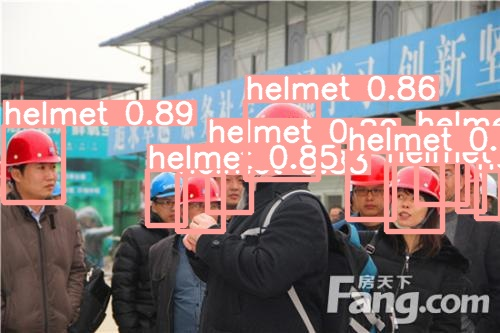

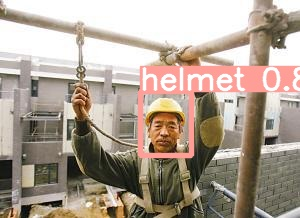

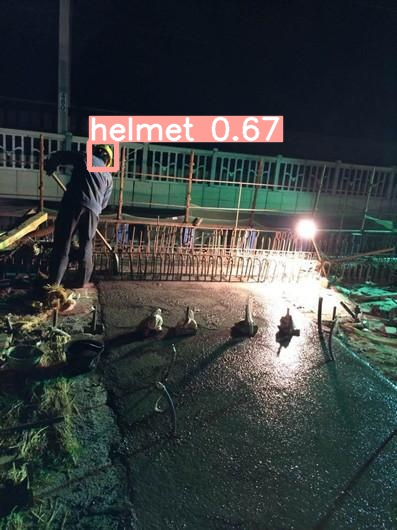

In [ ]:
import glob
from IPython.display import Image, display

for image_path in glob.glob(f'{HOME}/runs/detect/predict/*.jpg')[:3]:
      display(Image(filename=image_path, width=600))
      print("\n")

### Justification of parameters

!yolo task=detect mode=train model=yolov8s.pt data={dataset.location}/data.yaml epochs=5 imgsz=800 plots=True

The above-chosen parameters are outlined below.

Epochs = 5 

*   I have chosen to use epochs = 5 in this case as the usage of a large number for epochs can be computationally expensive and increase the training time quite excessively. I wanted to have a baseline for epochs from which I can have a baseline model performance of which to gage from. I wanted to gage the model performance to see if need to train the model further to improve performance, using lower epochs for lower training time. 

imgsz = 800

*   This parameter here determines the input image size during training. Using an imgsz of 800 enables a balance between accuracy and computational resources. Larger images can capture more details leading to potentially better performance but of require more computational resources. An imgsz size of 800 balances optimal performance and computational resources and so allows for good performance without using too little or too excessive computational resources. I wanted this paramter as a balanced 800 as a baseline from which I can further adapt my model. 

Plots = True 


*   The plots parameter enables the generation of plots during training. Setting this parameter as true allowed for a representation of metrics such as loss curves and other evaluation metrics. I did this to monitor the training progress and understand the model improvement over time. This was done for a visualisation purposes to know if i should continue tuning the model hyperparameters and keep track of the model performance after doing this continously. 





### Evaluation of model1 with hyperparameter version 1

Certainly! Let's dive deeper into the performance of the other classes in the validation dataset and evaluate whether the results indicate good or bad performance:

1. `head` class:
   - Precision: 0.927
   - Recall: 0.936
   - mAP50: 0.964
   - mAP50-95: 0.666

   The `head` class shows excellent performance across all metrics. With a precision of 0.927, it means that the model correctly identifies 92.7% of predicted head bounding boxes. The recall of 0.936 indicates that the model captures 93.6% of the actual head instances present in the images. The mAP50 score of 0.964 implies that the model achieves a high average precision at the IoU threshold of 0.50 specifically for the `head` class. The mAP50-95 score of 0.666 shows that the performance remains relatively strong even when considering a range of IoU thresholds from 0.50 to 0.95.

   Overall, the model performs exceptionally well in detecting heads, with high precision, recall, and mAP scores. This indicates that it accurately localizes and identifies heads in the images.

2. `helmet` class:
   - Precision: 0.953
   - Recall: 0.960
   - mAP50: 0.986
   - mAP50-95: 0.675

   The `helmet` class also demonstrates excellent performance across all metrics. The precision of 0.953 suggests that the model correctly identifies 95.3% of predicted helmet bounding boxes. The recall of 0.960 indicates that the model captures 96.0% of the actual helmet instances. The mAP50 score of 0.986 implies a high average precision at the IoU threshold of 0.50 specifically for the `helmet` class. The mAP50-95 score of 0.675 suggests that the performance remains relatively strong even when considering a range of IoU thresholds from 0.50 to 0.95.

   These results indicate that the model excels at detecting helmets, with high precision, recall, and mAP scores. It can accurately localize and classify helmet objects in the images.

3. `person` class:
   - Precision: 0.390
   - Recall: 0.0634
   - mAP50: 0.115
   - mAP50-95: 0.0653

   The `person` class exhibits relatively lower performance compared to the previous two classes. The precision of 0.390 means that the model correctly identifies 39.0% of predicted person bounding boxes. The recall of 0.0634 indicates that the model captures only 6.34% of the actual person instances present in the images. The mAP50 score of 0.115 implies a lower average precision at the IoU threshold of 0.50 specifically for the `person` class. The mAP50-95 score of 0.0653 suggests that the performance remains relatively low even when considering a range of IoU thresholds from 0.50 to 0.95.

   These results indicate that the model struggles to detect persons accurately, with lower precision, recall, and mAP scores for the `person` class. It may have difficulty localizing and identifying person objects in the images, which could be an area for improvement.

In summary, the model performs exceptionally well in detecting heads and helmets, with high precision, recall, and mAP scores for these classes. However, it exhibits lower performance in detecting persons, with lower precision, recall

## Hyperparamter Version 2

### Custom Training

The dataset does not have a validation setbut the data.yaml has a path with /valid in it. And so, in the datasets/Hard-Hat-Workers-2/data.yml file, I changed the valid directory to be the train one and so instead of /valid/images, it will be /train/images.

In [ ]:
%cd {HOME}

!yolo task=detect mode=train model=yolov8s.pt data={dataset.location}/data.yaml epochs=10 imgsz=800 plots=True

/content
Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.0.1+cu118 CPU
yolo/engine/trainer: task=detect, mode=train, model=yolov8s.yaml, data=/content/datasets/Hard-Hat-Workers-2/data.yaml, epochs=10, patience=50, batch=16, imgsz=800, save=True, cache=False, device=, workers=8, project=None, name=None, exist_ok=False, pretrained=False, optimizer=SGD, verbose=True, seed=0, deterministic=True, single_cls=False, image_weights=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, overlap_mask=True, mask_ratio=4, dropout=False, val=True, save_json=False, save_hybrid=False, conf=0.001, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=ultralytics/assets/, show=False, save_txt=False, save_conf=False, save_crop=False, hide_labels=False, hide_conf=False, vid_stride=1, line_thickness=3, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format=torchscript, keras=False, optimize=False, int8=False, dynamic=False, simplify=Fals

In [ ]:
!ls {HOME}/runs/detect/train6/

args.yaml  weights


/content


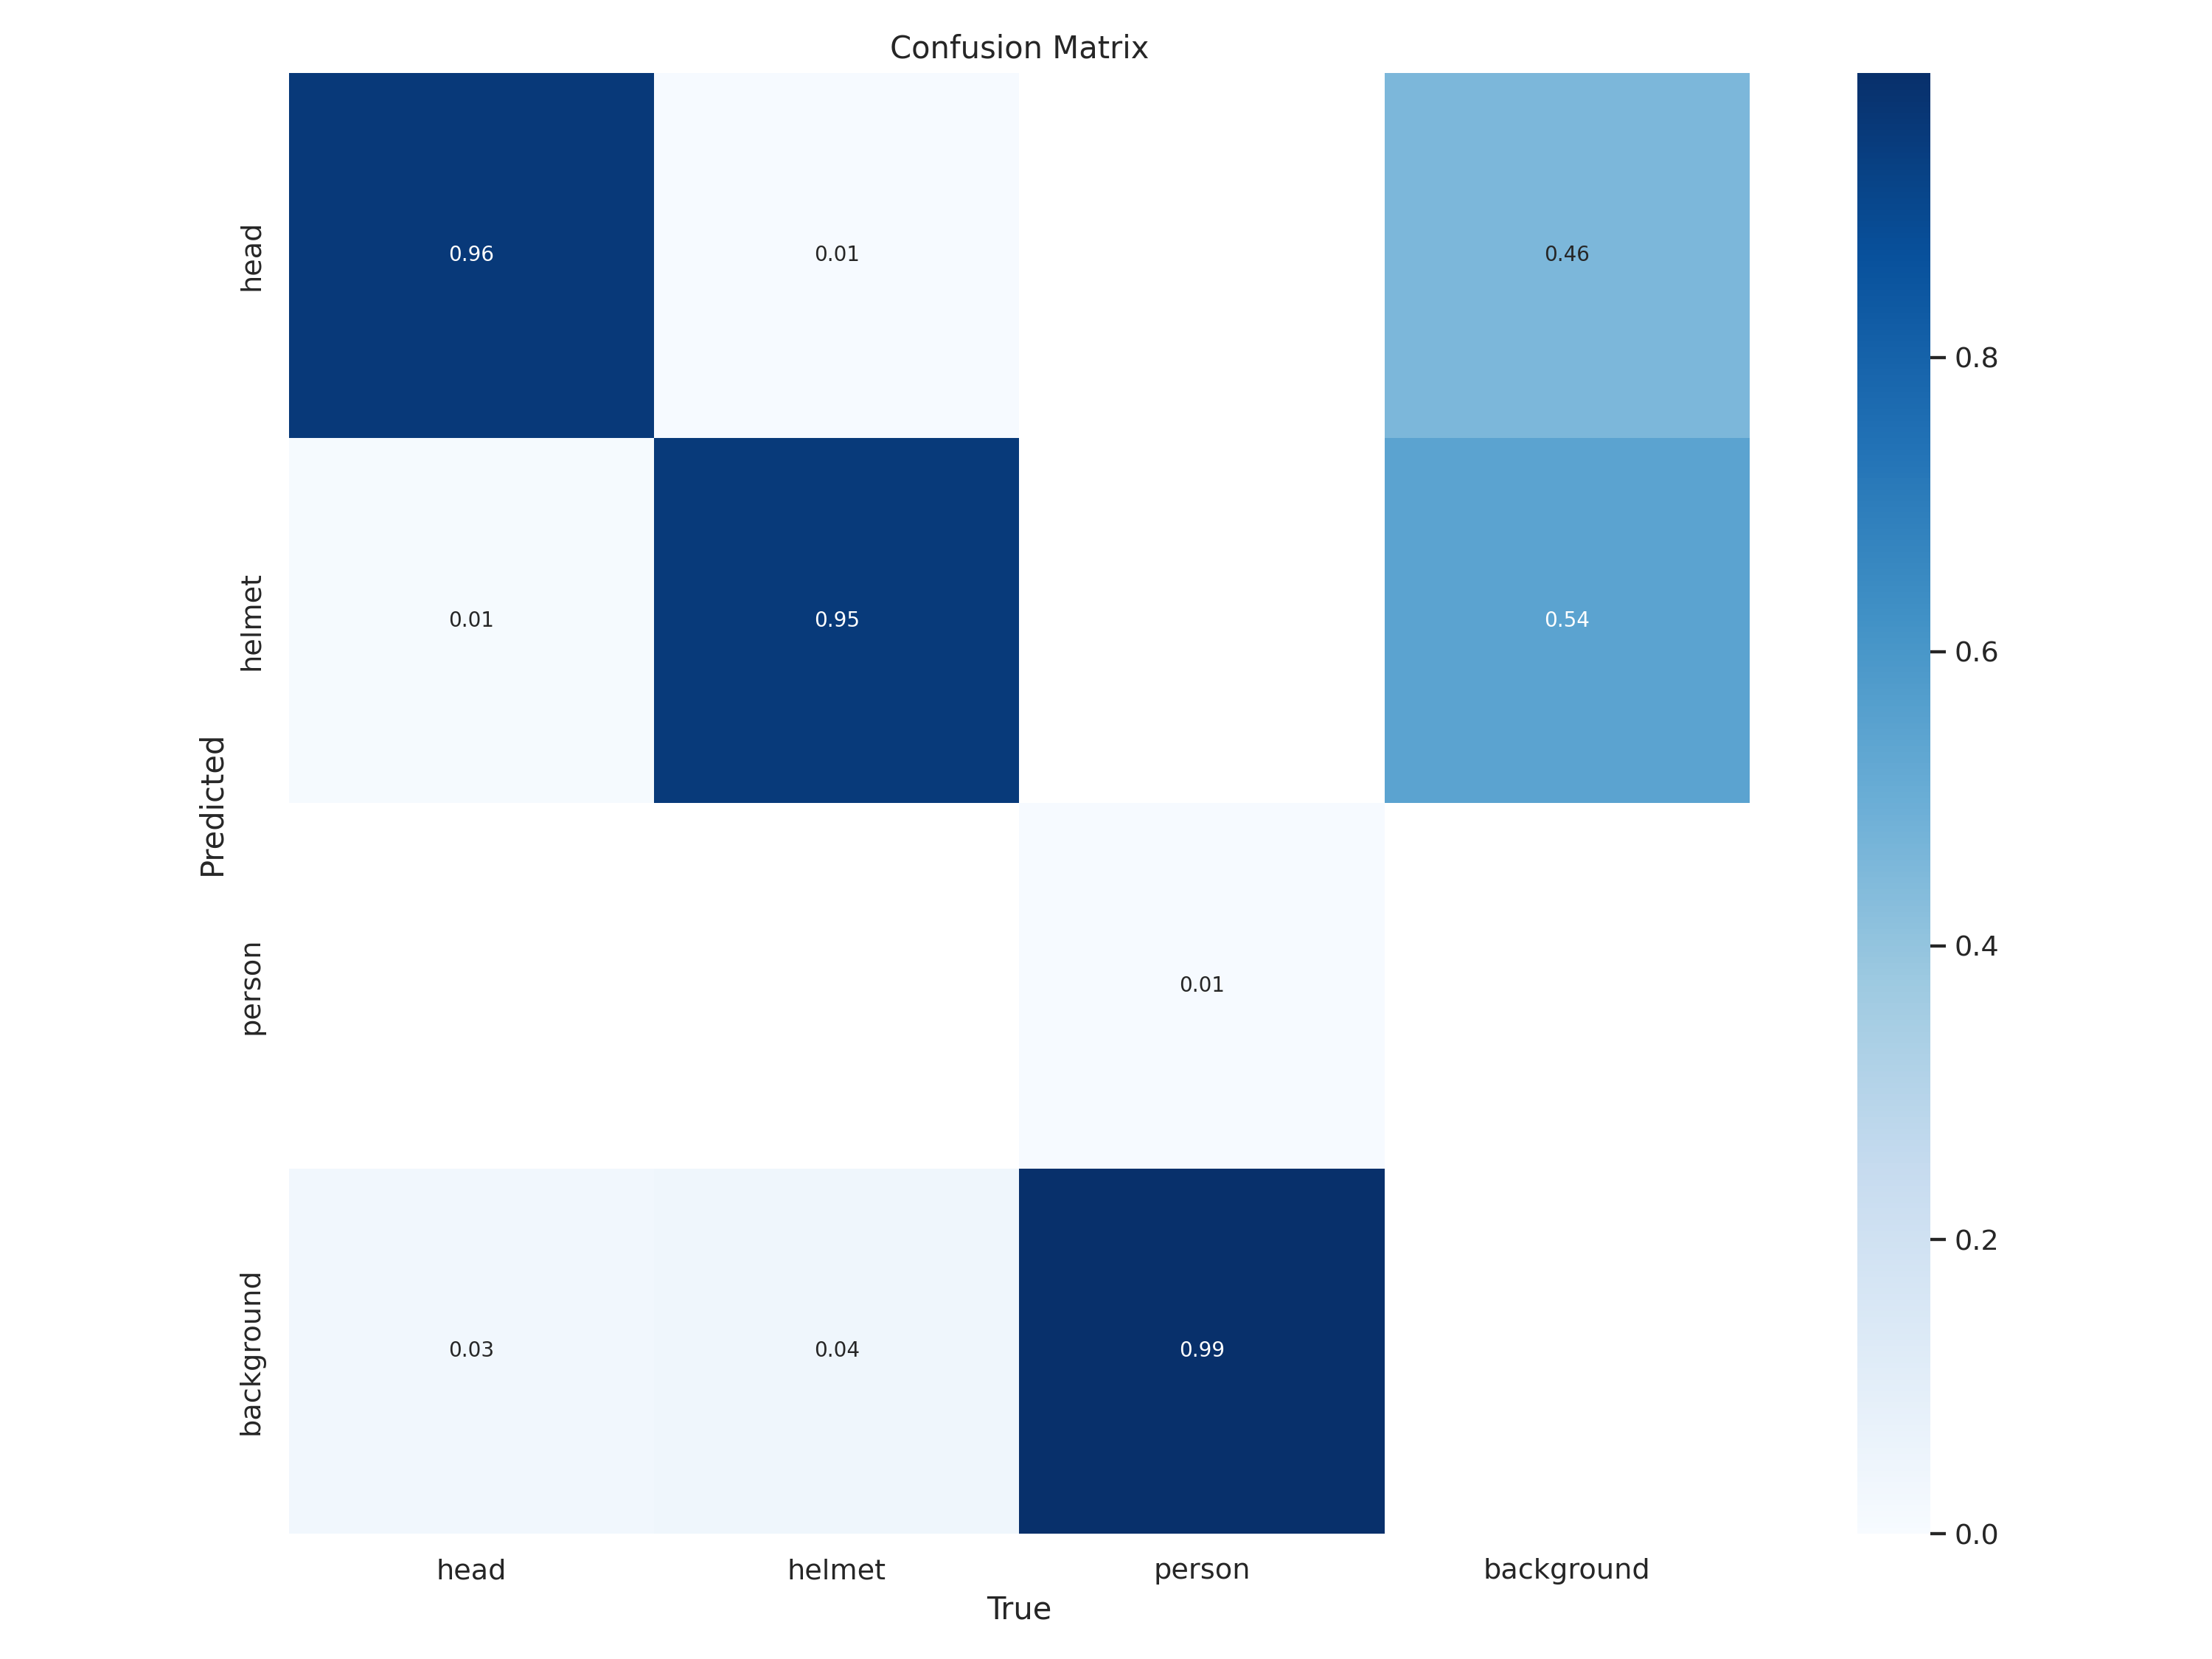

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train6/confusion_matrix.png', width=600)

In [ ]:
### saving the image of the matrix so that I dont have to run the model again.
import matplotlib.pyplot as plt
%cd {HOME}
# Save the image
plt.savefig('{HOME}/runs/detect/train6/confusion_matrix.png')

/content


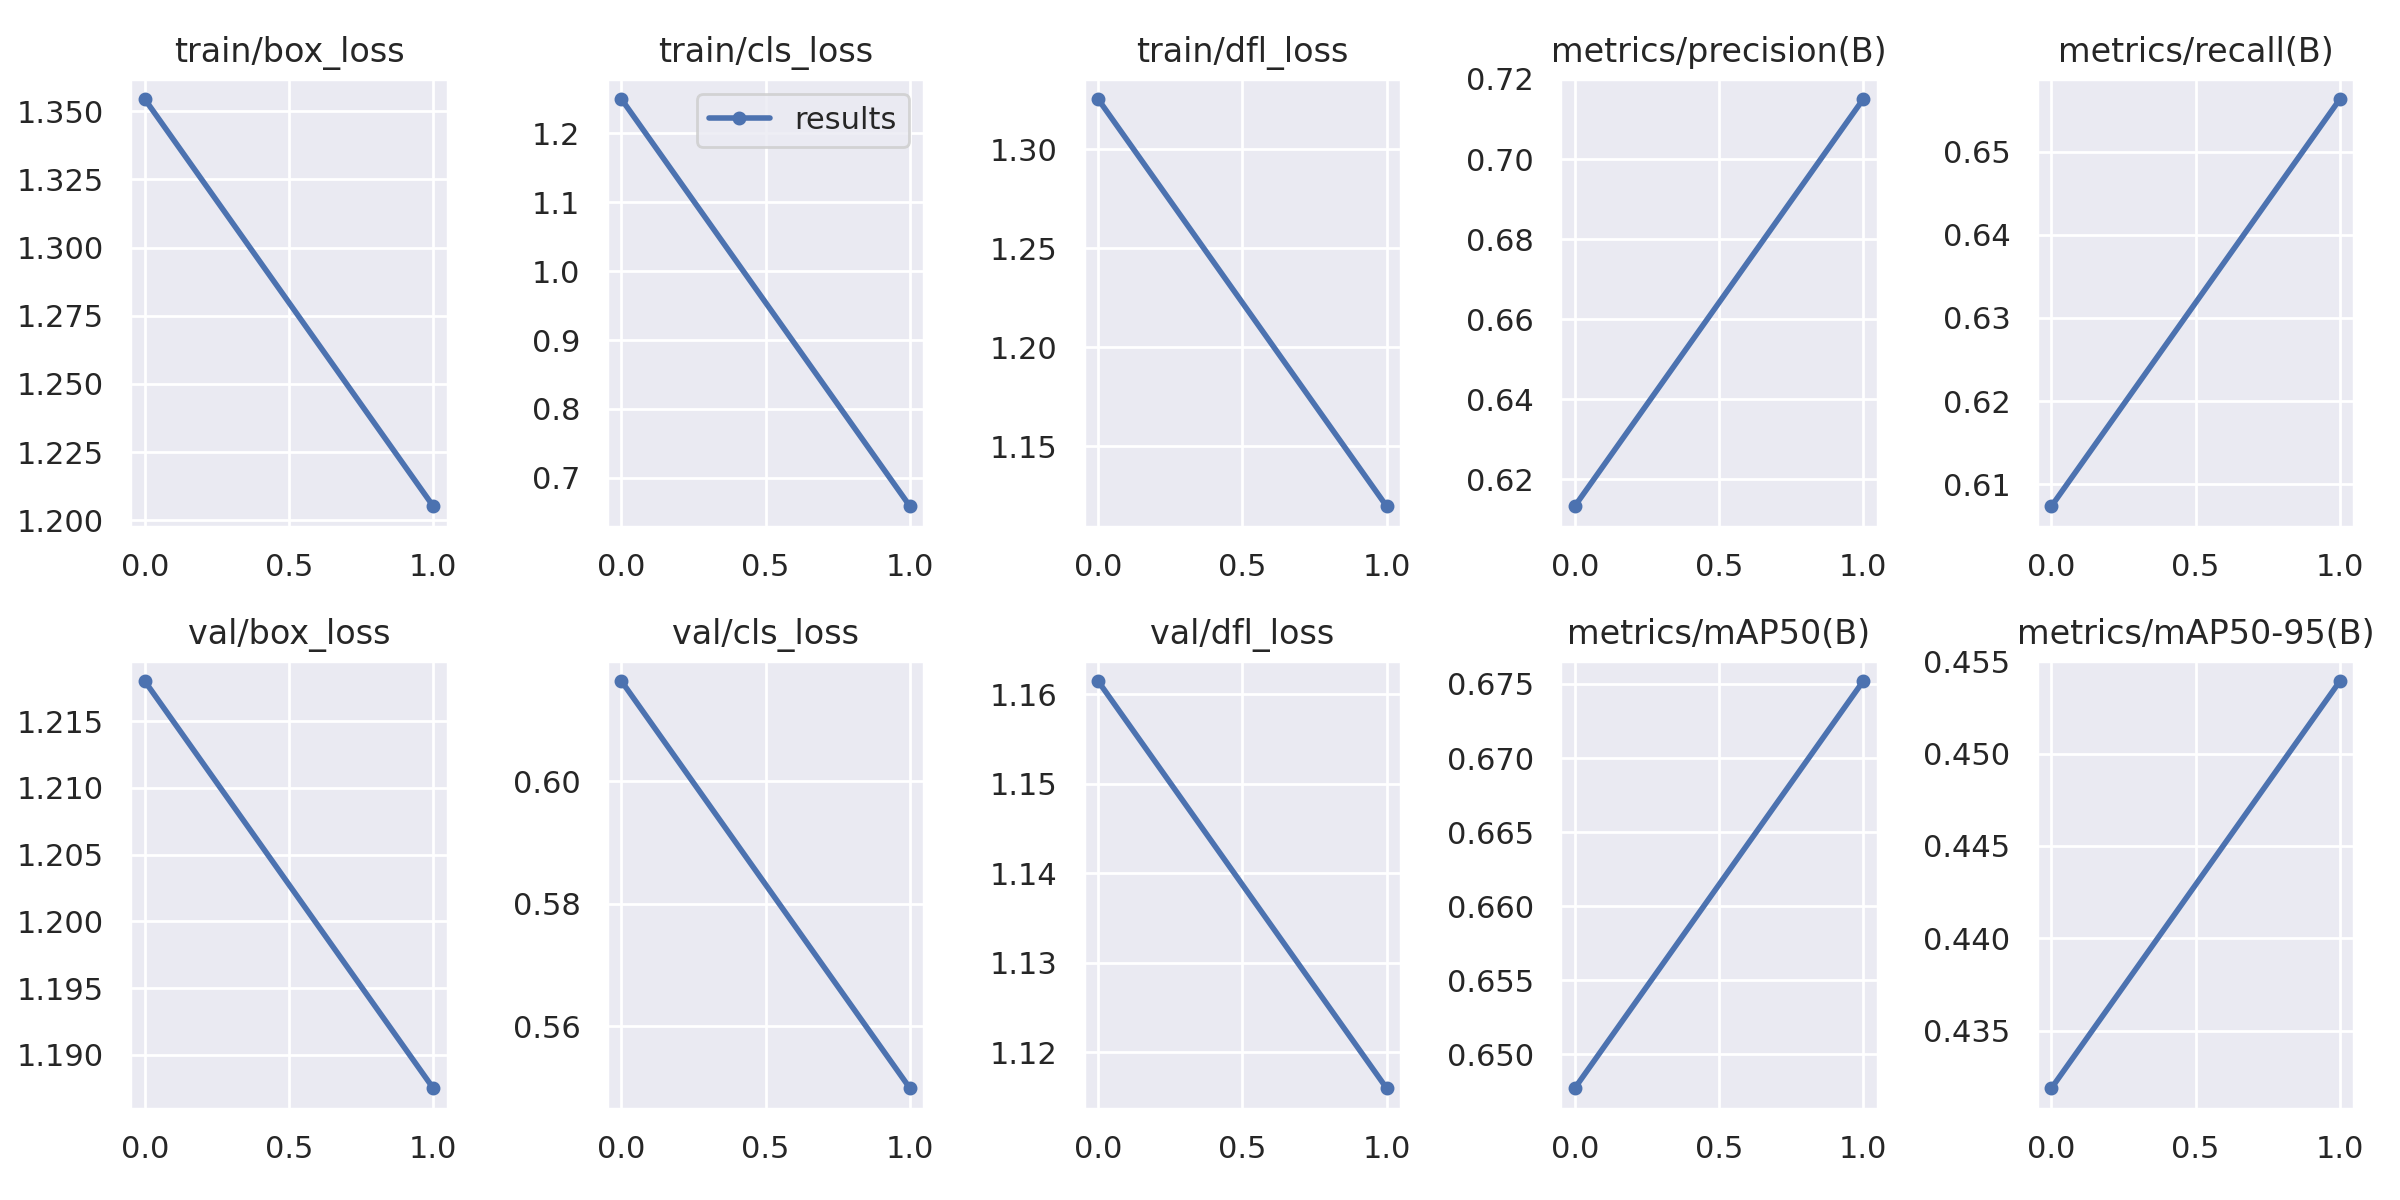

In [ ]:

%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train6/results.png', width=600)

In [ ]:
### saving the results so I do not have to run the model again
from PIL import Image

%cd {HOME}
# Save the image
image_path = f'{HOME}/runs/detect/train6/results.png'
Image(filename=image_path).save(image_path)

/content


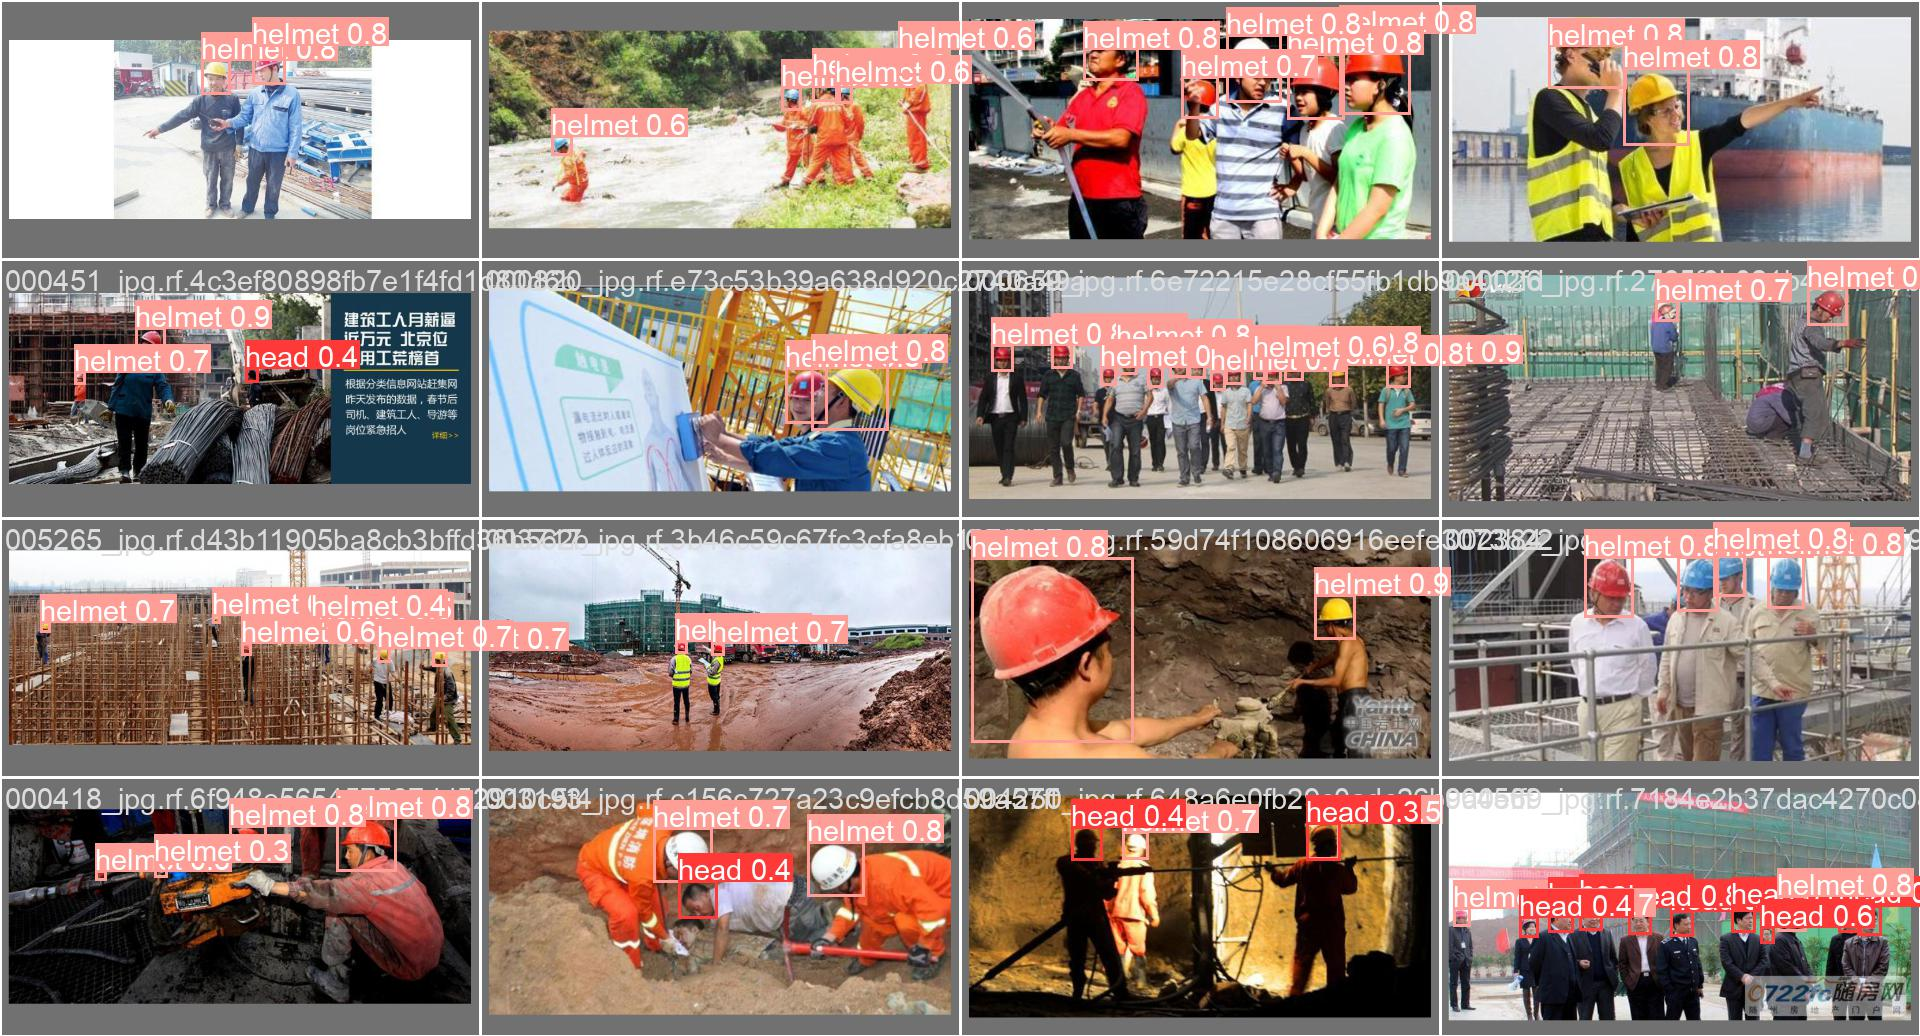

In [ ]:

%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train6/val_batch0_pred.jpg', width=600)

In [ ]:
### saving the images as per the above
from PIL import Image
%cd {HOME}

# Save the image
image_path = f'{HOME}/runs/detect/train6/val_batch0_pred.jpg'
Image(filename=image_path).save(image_path)

### Validate Custom Model

In [ ]:
%cd {HOME}

!yolo task=detect mode=val model={HOME}/runs/detect/train6/weights/best.pt data={dataset.location}/data.yaml

/content
2023-06-08 11:14:17.283015: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-06-08 11:14:18.582386: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Ultralytics YOLOv8.0.20 🚀 Python-3.10.11 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11126745 parameters, 0 gradients, 28.4 GFLOPs
val: Scanning /content/datasets/Hard-Hat-Workers-2/train/labels.cache... 5269 images, 0 backgrounds, 0 corrupt: 100% 5269/5269 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 330/330 [01:28<00:00,  3.75it/s]
                   all       5269      20231      0.875      0.858      0.893      0.676
                  head    

### Inference with Custom Model

In [ ]:
%cd {HOME}
!yolo task=detect mode=predict model={HOME}/runs/detect/train6/weights/best.pt conf=0.25 source={dataset.location}/test/images save=True

/content
2023-06-08 11:17:50.300743: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-06-08 11:17:51.172018: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Ultralytics YOLOv8.0.20 🚀 Python-3.10.11 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11126745 parameters, 0 gradients, 28.4 GFLOPs
image 1/1766 /content/datasets/Hard-Hat-Workers-2/test/images/005298_jpg.rf.647d148af5d961d8bbc041f172247170.jpg: 544x800 8 helmets, 55.7ms
image 2/1766 /content/datasets/Hard-Hat-Workers-2/test/images/005299_jpg.rf.71165960b763340fddc7e7cd0e448cb5.jpg: 544x800 1 helmet, 17.6ms
image 3/1766 /content/datasets/Hard-Hat-Workers-2/test/images/005300_jpg.rf.1670526983a03ed2ccc2ff28c90e0040

**NOTE:** Let's take a look at few results.

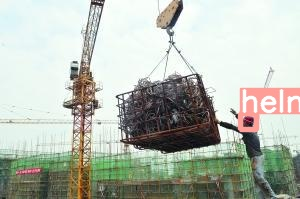

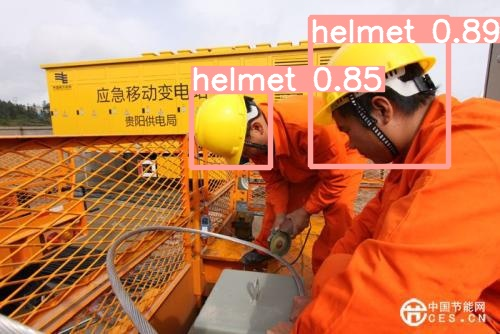

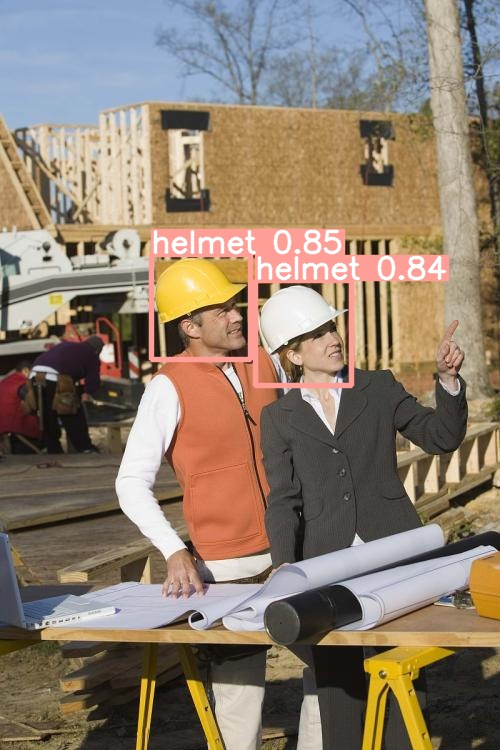

In [ ]:
import glob
from IPython.display import Image, display

for image_path in glob.glob(f'{HOME}/runs/detect/predict/*.jpg')[:3]:
      display(Image(filename=image_path, width=600))
      print("\n")

### Justification of parameters

### Evaluation of model 1 with hyperparamter 2

## Hyperparamter Version 3

### Custom Training

The dataset does not have a validation setbut the data.yaml has a path with /valid in it. And so, in the datasets/Hard-Hat-Workers-2/data.yml file, I changed the valid directory to be the train one and so instead of /valid/images, it will be /train/images.

In [ ]:
%cd {HOME}

!yolo task=detect mode=train model=yolov8s.pt data={dataset.location}/data.yaml epochs=2 imgsz=800 plots=True

/content
Ultralytics YOLOv8.0.20 🚀 Python-3.10.11 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
yolo/engine/trainer: task=detect, mode=train, model=yolov8s.yaml, data=/content/datasets/Hard-Hat-Workers-2/data.yaml, epochs=2, patience=50, batch=16, imgsz=800, save=True, cache=False, device=, workers=8, project=None, name=None, exist_ok=False, pretrained=False, optimizer=SGD, verbose=True, seed=0, deterministic=True, single_cls=False, image_weights=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, overlap_mask=True, mask_ratio=4, dropout=False, val=True, save_json=False, save_hybrid=False, conf=0.001, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=ultralytics/assets/, show=False, save_txt=False, save_conf=False, save_crop=False, hide_labels=False, hide_conf=False, vid_stride=1, line_thickness=3, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format=torchscript, keras=False, optimize=False, int8=False, dynam

In [ ]:
!ls {HOME}/runs/detect/train4/

args.yaml					     train_batch1.jpg
confusion_matrix.png				     train_batch2.jpg
events.out.tfevents.1686229986.3eac48f209cc.10756.0  val_batch0_labels.jpg
F1_curve.png					     val_batch0_pred.jpg
P_curve.png					     val_batch1_labels.jpg
PR_curve.png					     val_batch1_pred.jpg
R_curve.png					     val_batch2_labels.jpg
results.csv					     val_batch2_pred.jpg
results.png					     weights
train_batch0.jpg


/content


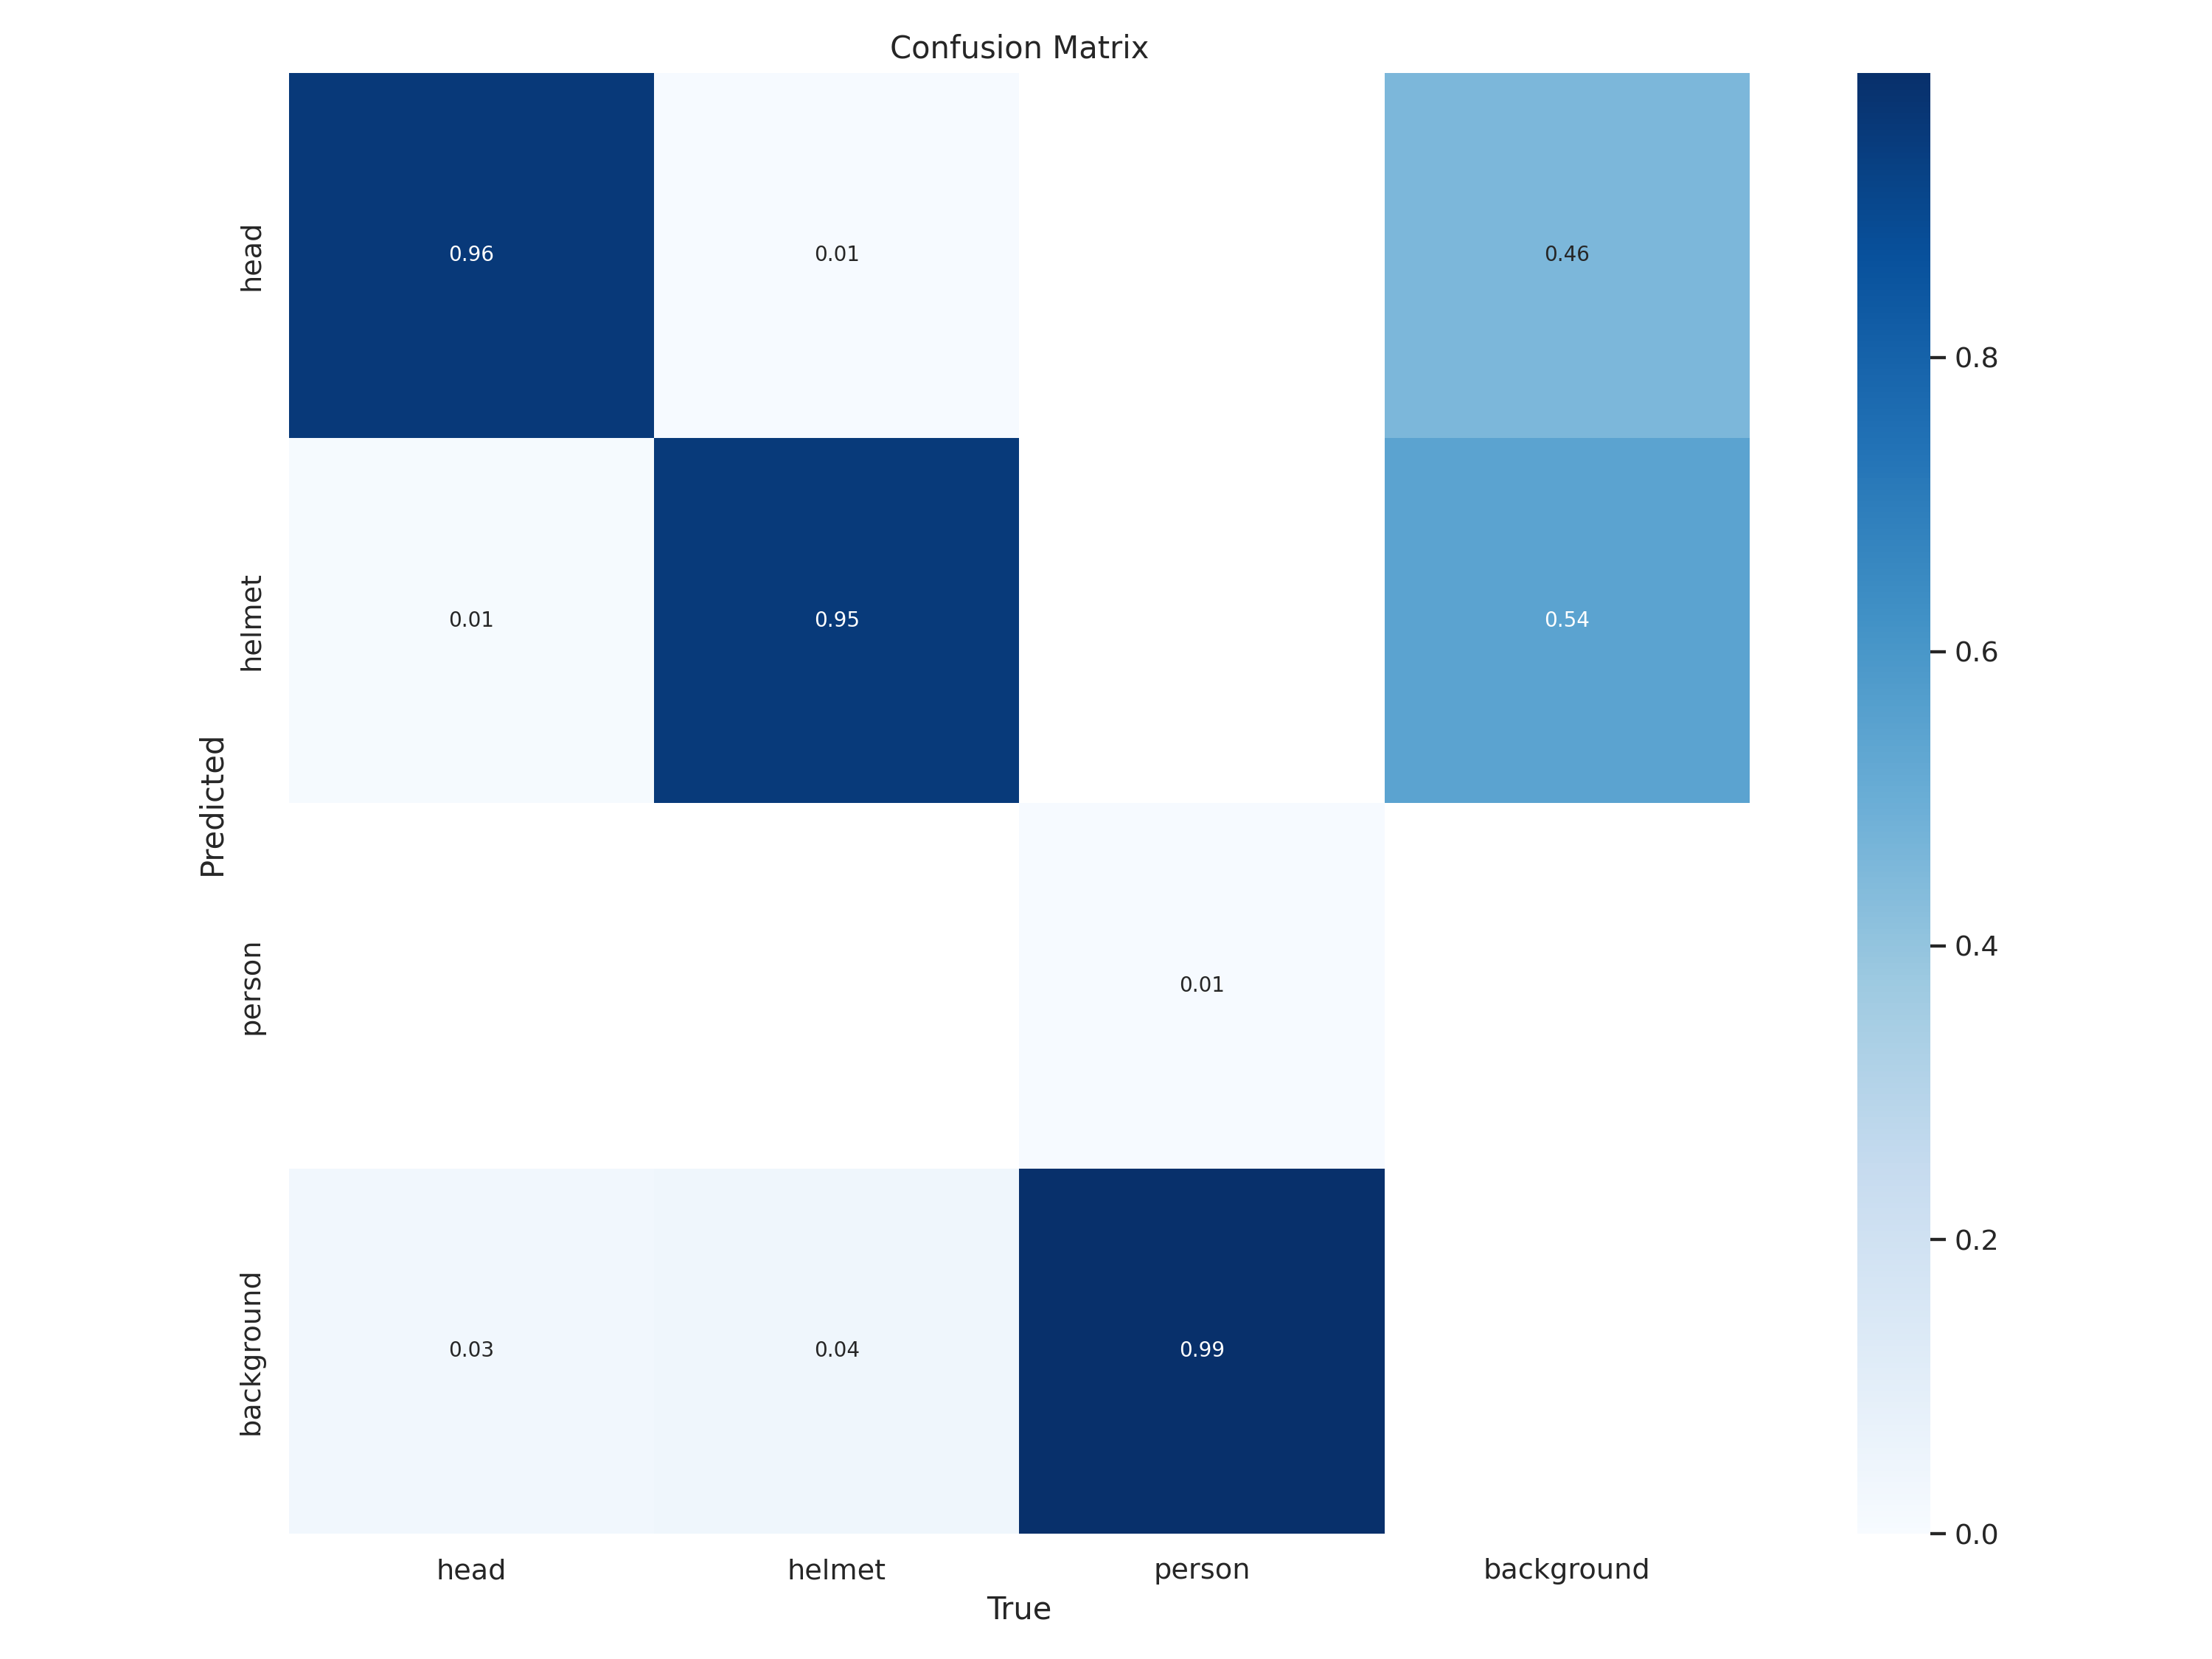

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train4/confusion_matrix.png', width=600)

In [ ]:
### saving the image of the matrix so that I dont have to run the model again.
import matplotlib.pyplot as plt
%cd {HOME}
# Save the image
plt.savefig('{HOME}/runs/detect/train4/confusion_matrix.png')

/content


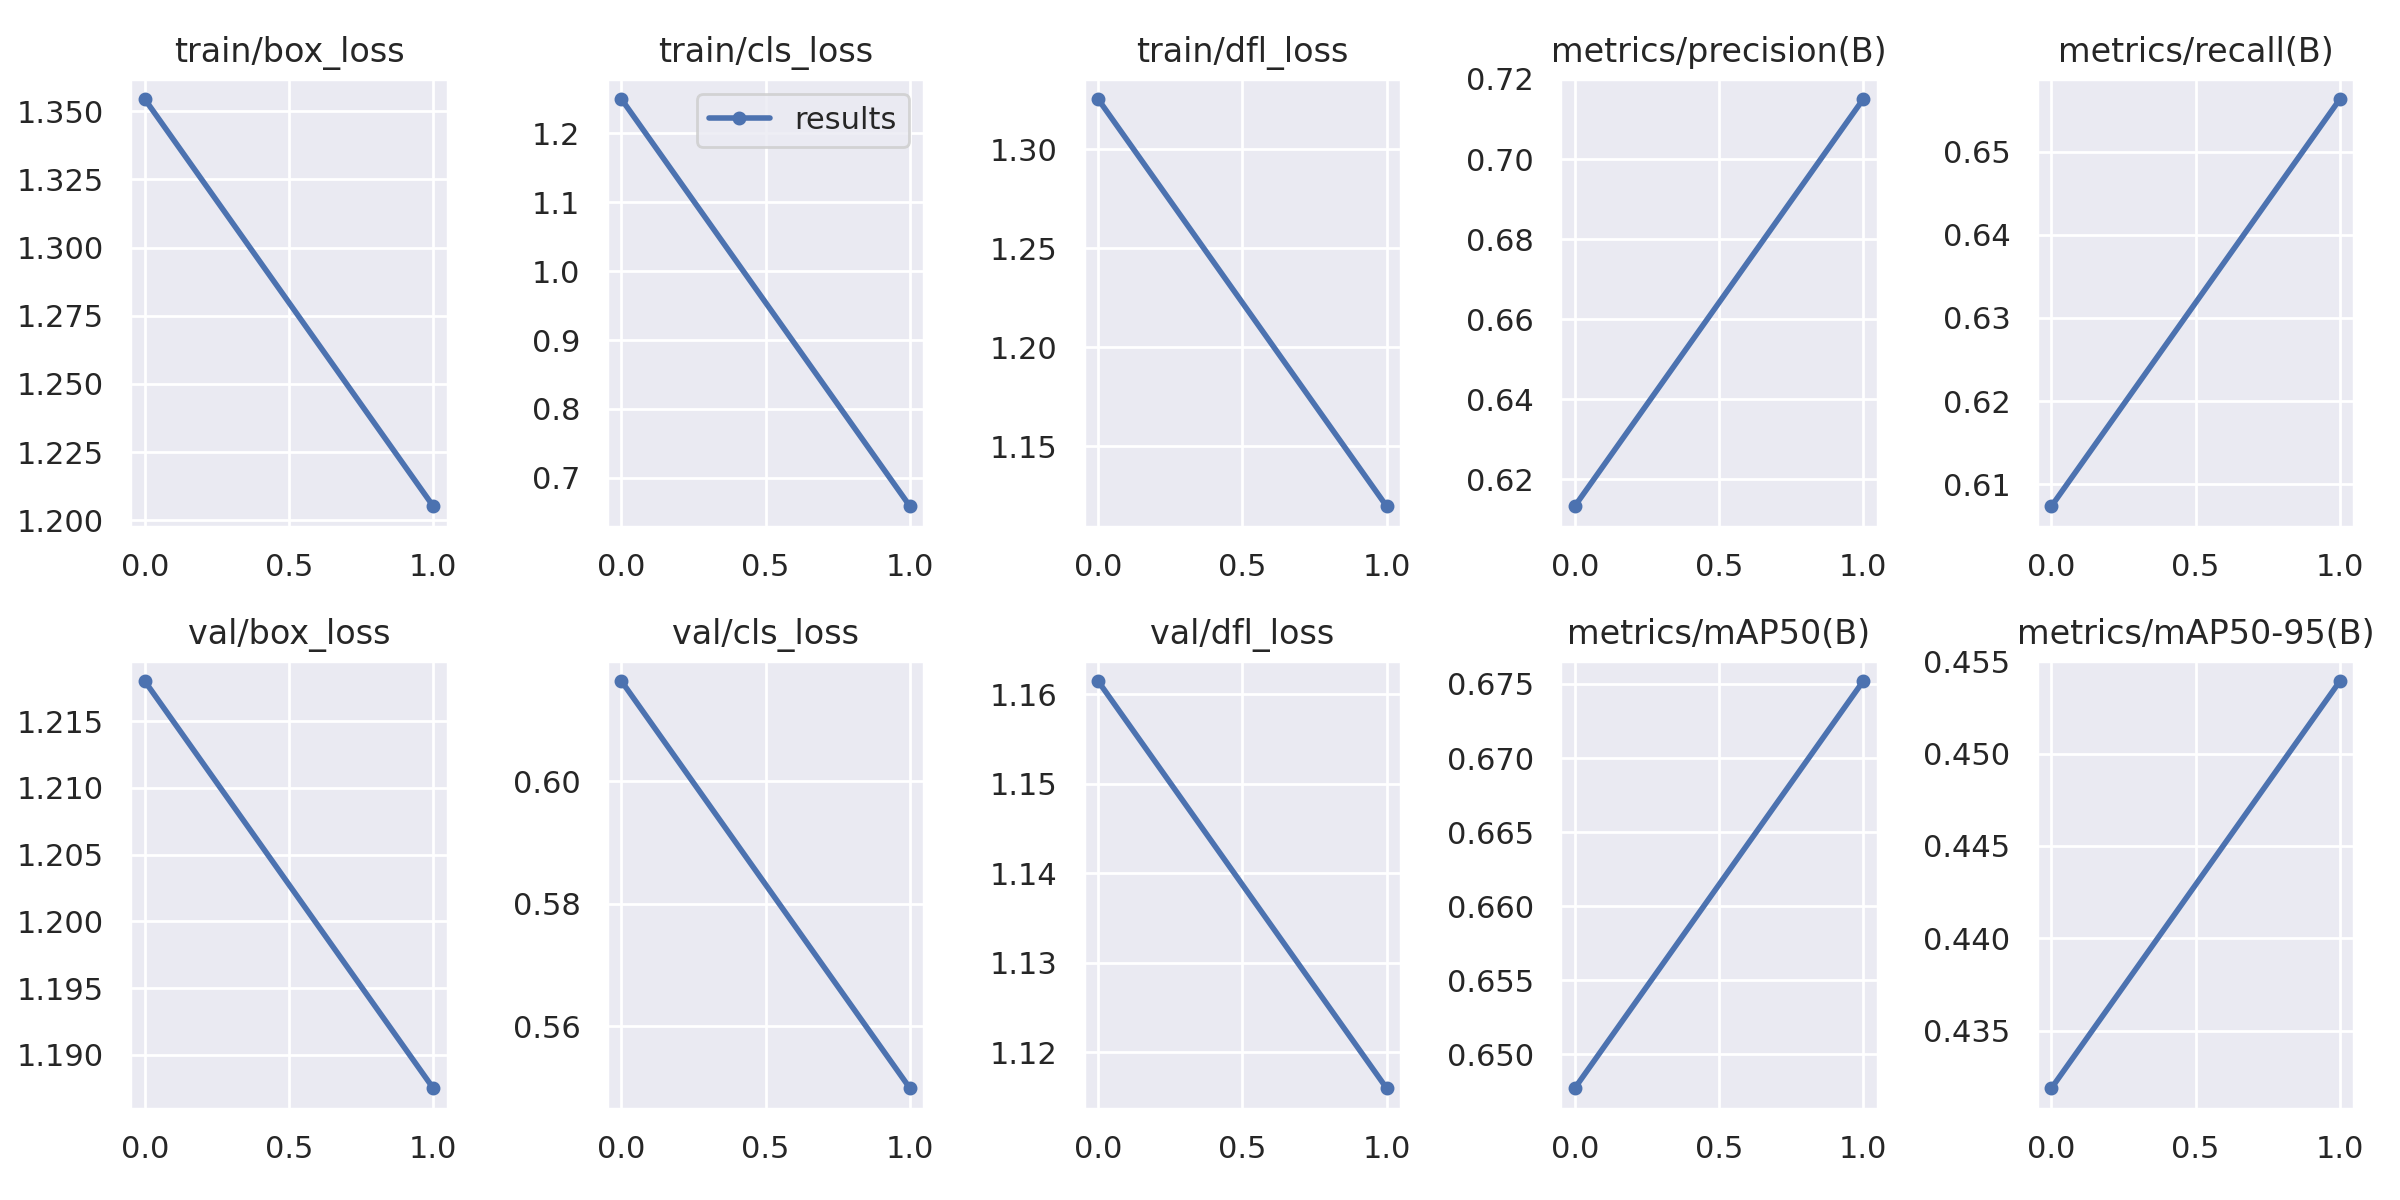

In [ ]:

%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train4/results.png', width=600)

In [ ]:
### saving the results so I do not have to run the model again
from PIL import Image

%cd {HOME}
# Save the image
image_path = f'{HOME}/runs/detect/train4/results.png'
Image(filename=image_path).save(image_path)

/content


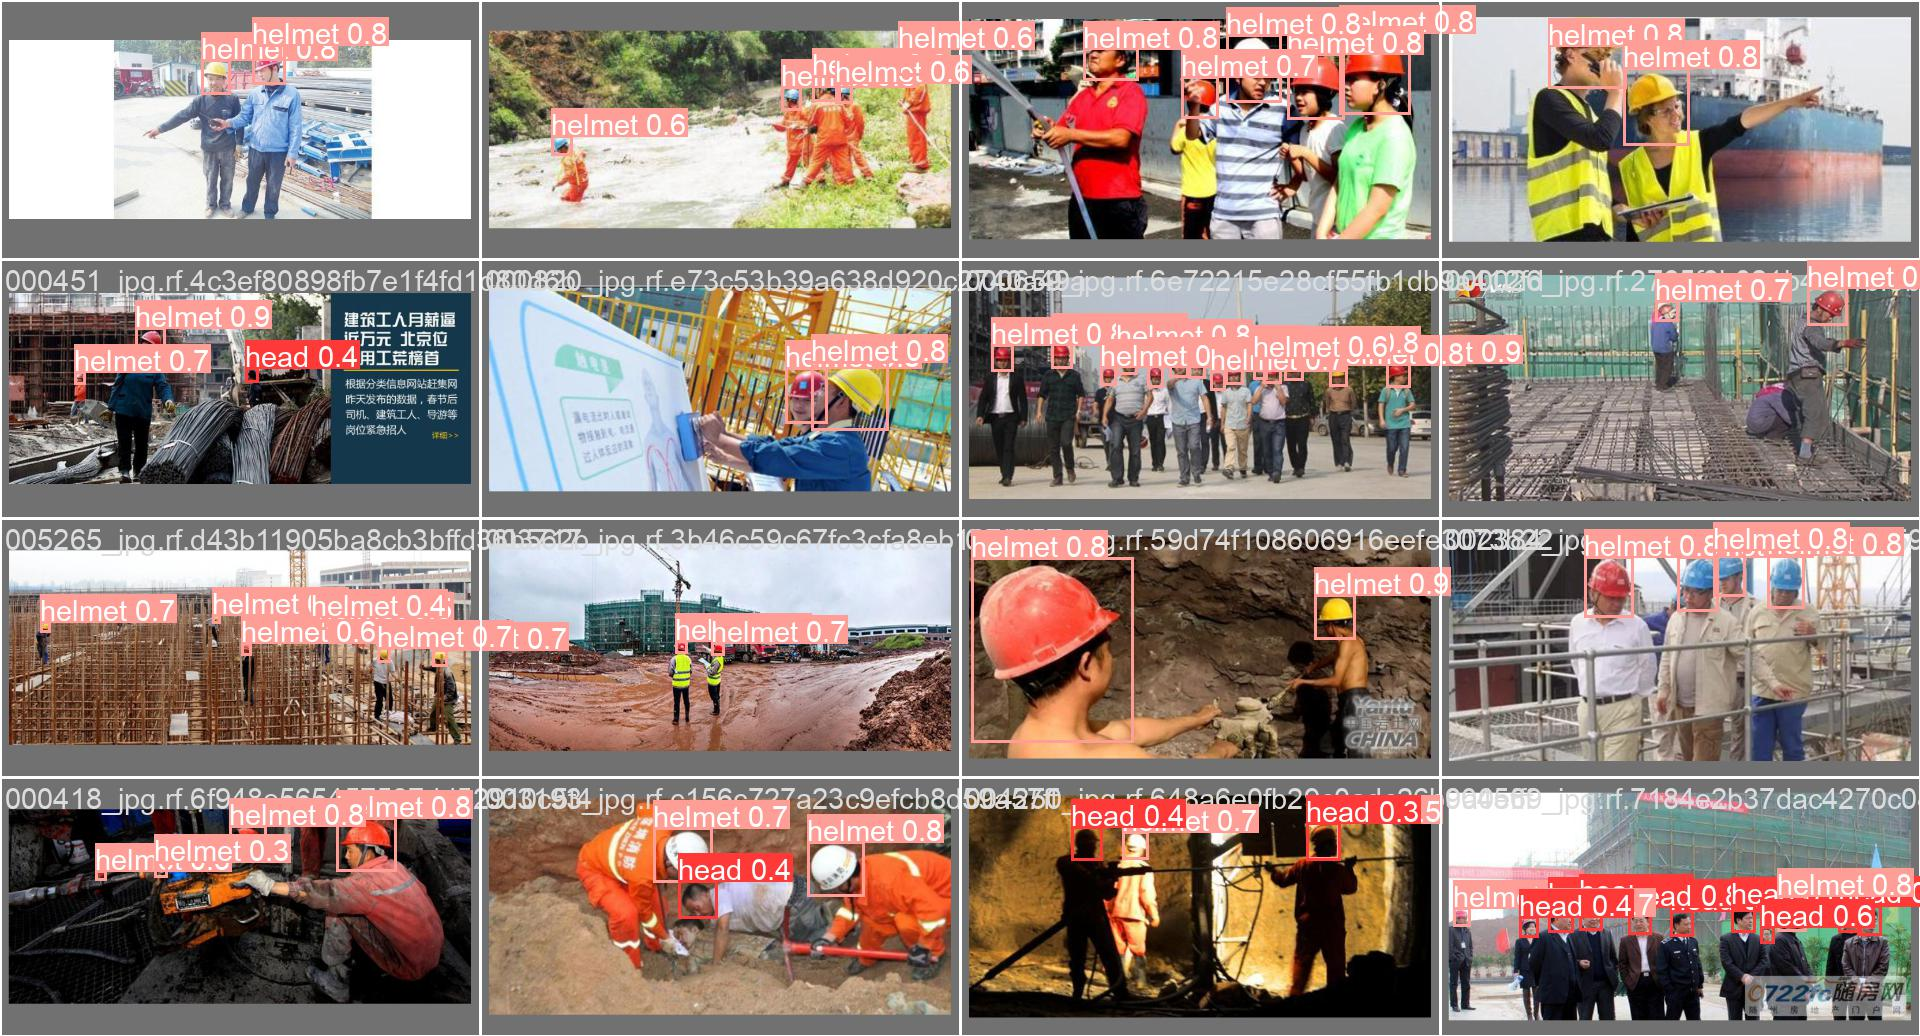

In [ ]:

%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/val_batch0_pred.jpg', width=600)

In [ ]:
### saving the images as per the above
from PIL import Image
%cd {HOME}

# Save the image
image_path = f'{HOME}/runs/detect/train/val_batch0_pred.jpg'
Image(filename=image_path).save(image_path)

### Validate Custom Model

In [ ]:
%cd {HOME}

!yolo task=detect mode=val model={HOME}/runs/detect/train3/weights/best.pt data={dataset.location}/data.yaml

/content
2023-06-08 11:14:17.283015: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-06-08 11:14:18.582386: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Ultralytics YOLOv8.0.20 🚀 Python-3.10.11 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11126745 parameters, 0 gradients, 28.4 GFLOPs
val: Scanning /content/datasets/Hard-Hat-Workers-2/train/labels.cache... 5269 images, 0 backgrounds, 0 corrupt: 100% 5269/5269 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 330/330 [01:28<00:00,  3.75it/s]
                   all       5269      20231      0.875      0.858      0.893      0.676
                  head    

### Inference with Custom Model

In [ ]:
%cd {HOME}
!yolo task=detect mode=predict model={HOME}/runs/detect/train3/weights/best.pt conf=0.25 source={dataset.location}/test/images save=True

/content
2023-06-08 11:17:50.300743: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-06-08 11:17:51.172018: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Ultralytics YOLOv8.0.20 🚀 Python-3.10.11 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11126745 parameters, 0 gradients, 28.4 GFLOPs
image 1/1766 /content/datasets/Hard-Hat-Workers-2/test/images/005298_jpg.rf.647d148af5d961d8bbc041f172247170.jpg: 544x800 8 helmets, 55.7ms
image 2/1766 /content/datasets/Hard-Hat-Workers-2/test/images/005299_jpg.rf.71165960b763340fddc7e7cd0e448cb5.jpg: 544x800 1 helmet, 17.6ms
image 3/1766 /content/datasets/Hard-Hat-Workers-2/test/images/005300_jpg.rf.1670526983a03ed2ccc2ff28c90e0040

**NOTE:** Let's take a look at few results.

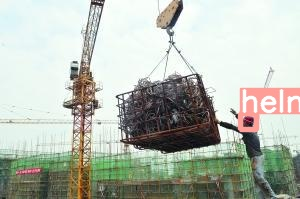

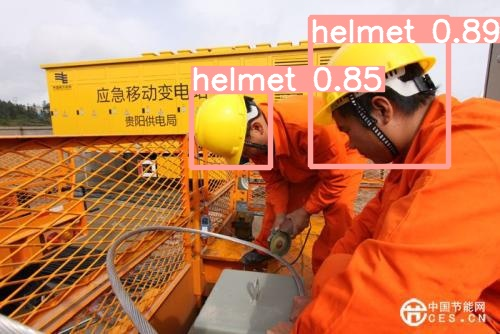

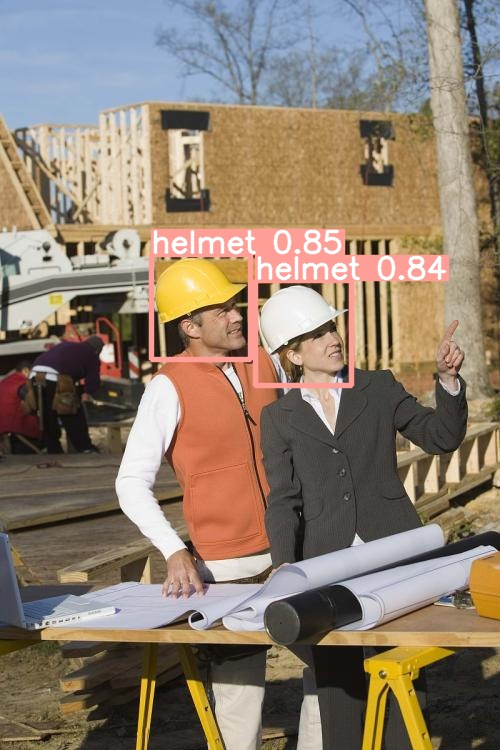

In [ ]:
import glob
from IPython.display import Image, display

for image_path in glob.glob(f'{HOME}/runs/detect/predict/*.jpg')[:3]:
      display(Image(filename=image_path, width=600))
      print("\n")

### Justification of parameters

### Evaluation of model 1 with hyperparameters 2

## Hyperparamter Version 4

### Custom Training

The dataset does not have a validation setbut the data.yaml has a path with /valid in it. And so, in the datasets/Hard-Hat-Workers-2/data.yml file, I changed the valid directory to be the train one and so instead of /valid/images, it will be /train/images.

In [ ]:
%cd {HOME}

!yolo task=detect mode=train model=yolov8s.pt data={dataset.location}/data.yaml epochs=2 imgsz=800 plots=True

/content
Ultralytics YOLOv8.0.20 🚀 Python-3.10.11 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
yolo/engine/trainer: task=detect, mode=train, model=yolov8s.yaml, data=/content/datasets/Hard-Hat-Workers-2/data.yaml, epochs=2, patience=50, batch=16, imgsz=800, save=True, cache=False, device=, workers=8, project=None, name=None, exist_ok=False, pretrained=False, optimizer=SGD, verbose=True, seed=0, deterministic=True, single_cls=False, image_weights=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, overlap_mask=True, mask_ratio=4, dropout=False, val=True, save_json=False, save_hybrid=False, conf=0.001, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=ultralytics/assets/, show=False, save_txt=False, save_conf=False, save_crop=False, hide_labels=False, hide_conf=False, vid_stride=1, line_thickness=3, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format=torchscript, keras=False, optimize=False, int8=False, dynam

In [ ]:
!ls {HOME}/runs/detect/train4/

args.yaml					     train_batch1.jpg
confusion_matrix.png				     train_batch2.jpg
events.out.tfevents.1686229986.3eac48f209cc.10756.0  val_batch0_labels.jpg
F1_curve.png					     val_batch0_pred.jpg
P_curve.png					     val_batch1_labels.jpg
PR_curve.png					     val_batch1_pred.jpg
R_curve.png					     val_batch2_labels.jpg
results.csv					     val_batch2_pred.jpg
results.png					     weights
train_batch0.jpg


/content


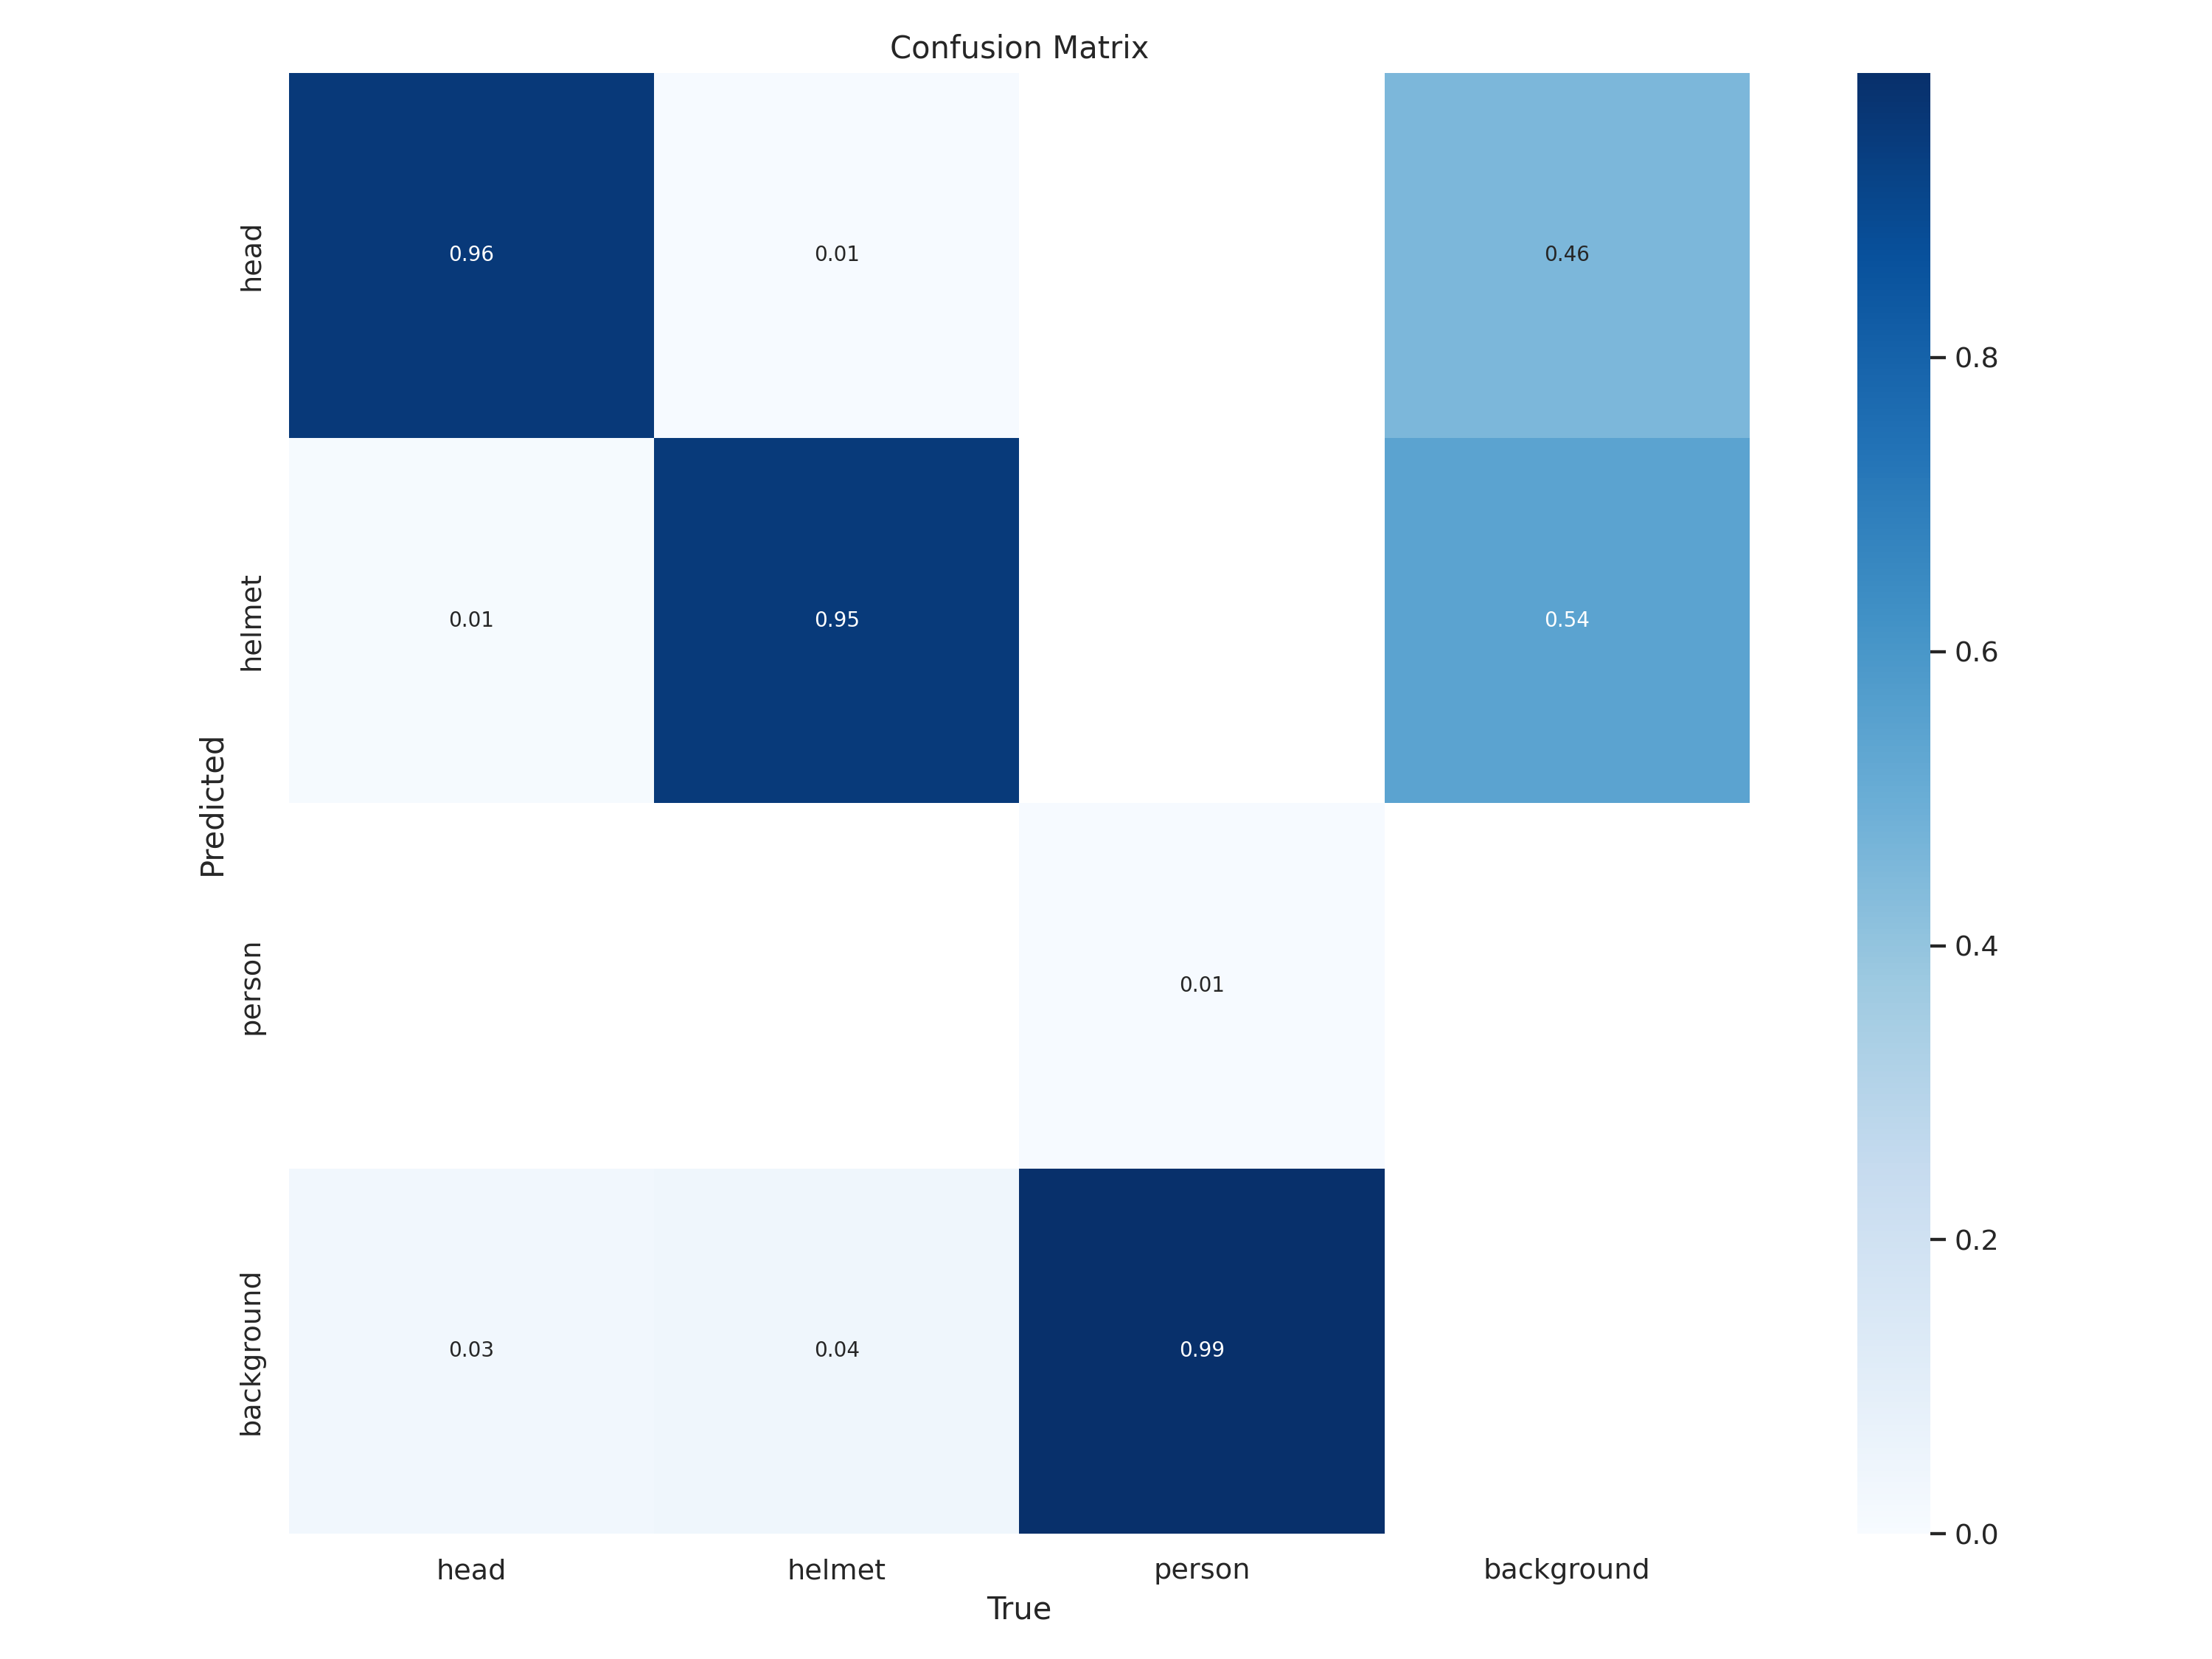

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train4/confusion_matrix.png', width=600)

In [ ]:
### saving the image of the matrix so that I dont have to run the model again.
import matplotlib.pyplot as plt
%cd {HOME}
# Save the image
plt.savefig('{HOME}/runs/detect/train4/confusion_matrix.png')


/content


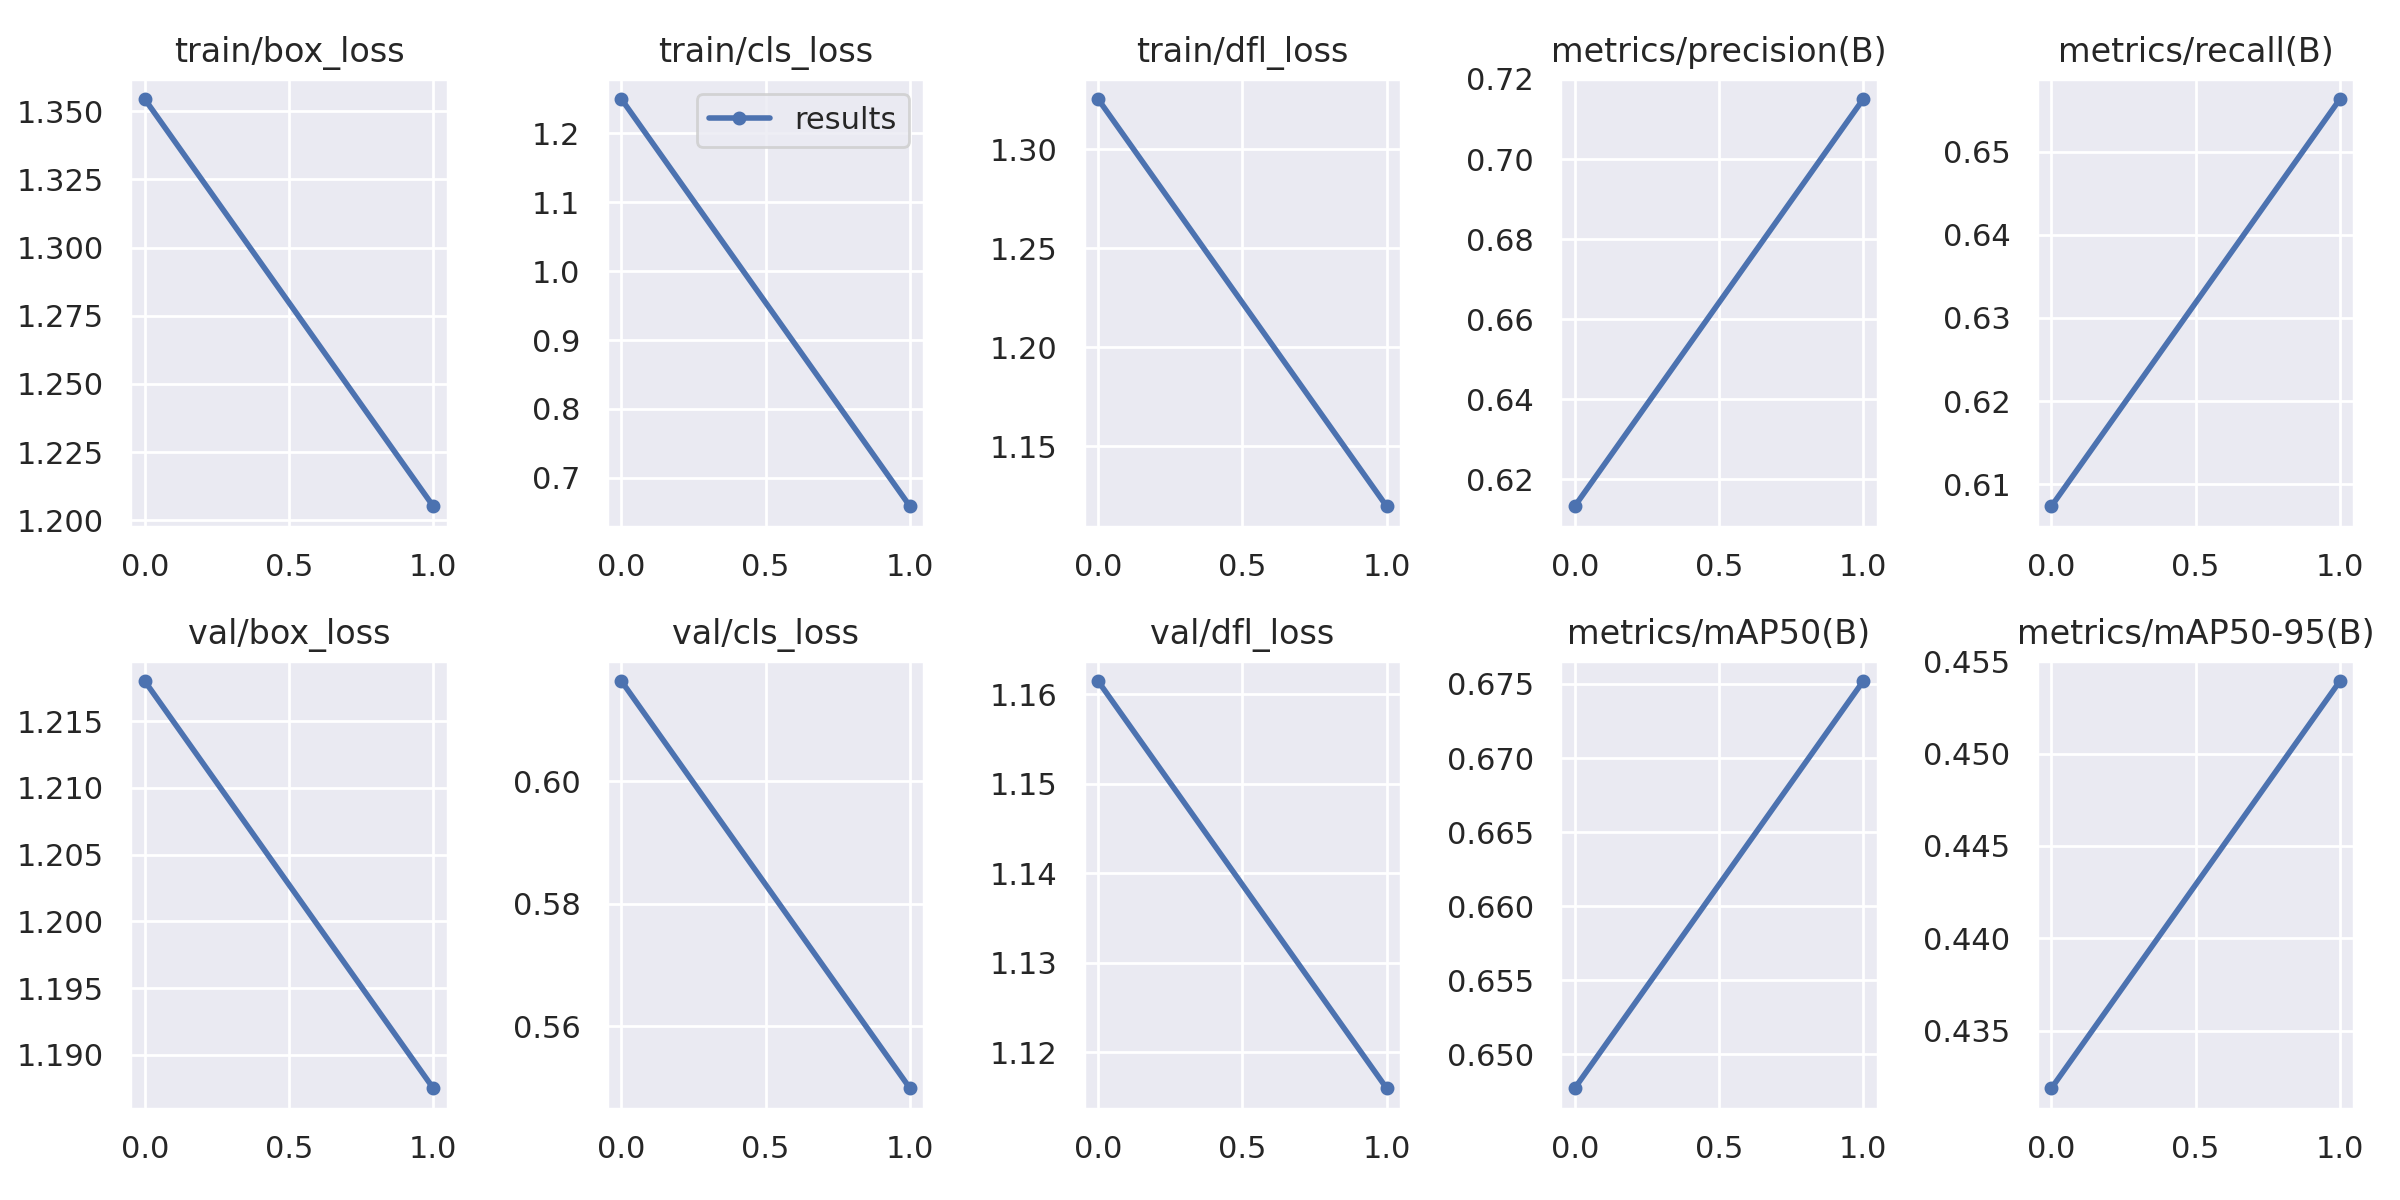

In [ ]:

%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train4/results.png', width=600)

In [ ]:
### saving the results so I do not have to run the model again
from PIL import Image

%cd {HOME}
# Save the image
image_path = f'{HOME}/runs/detect/train4/results.png'
Image(filename=image_path).save(image_path)


/content


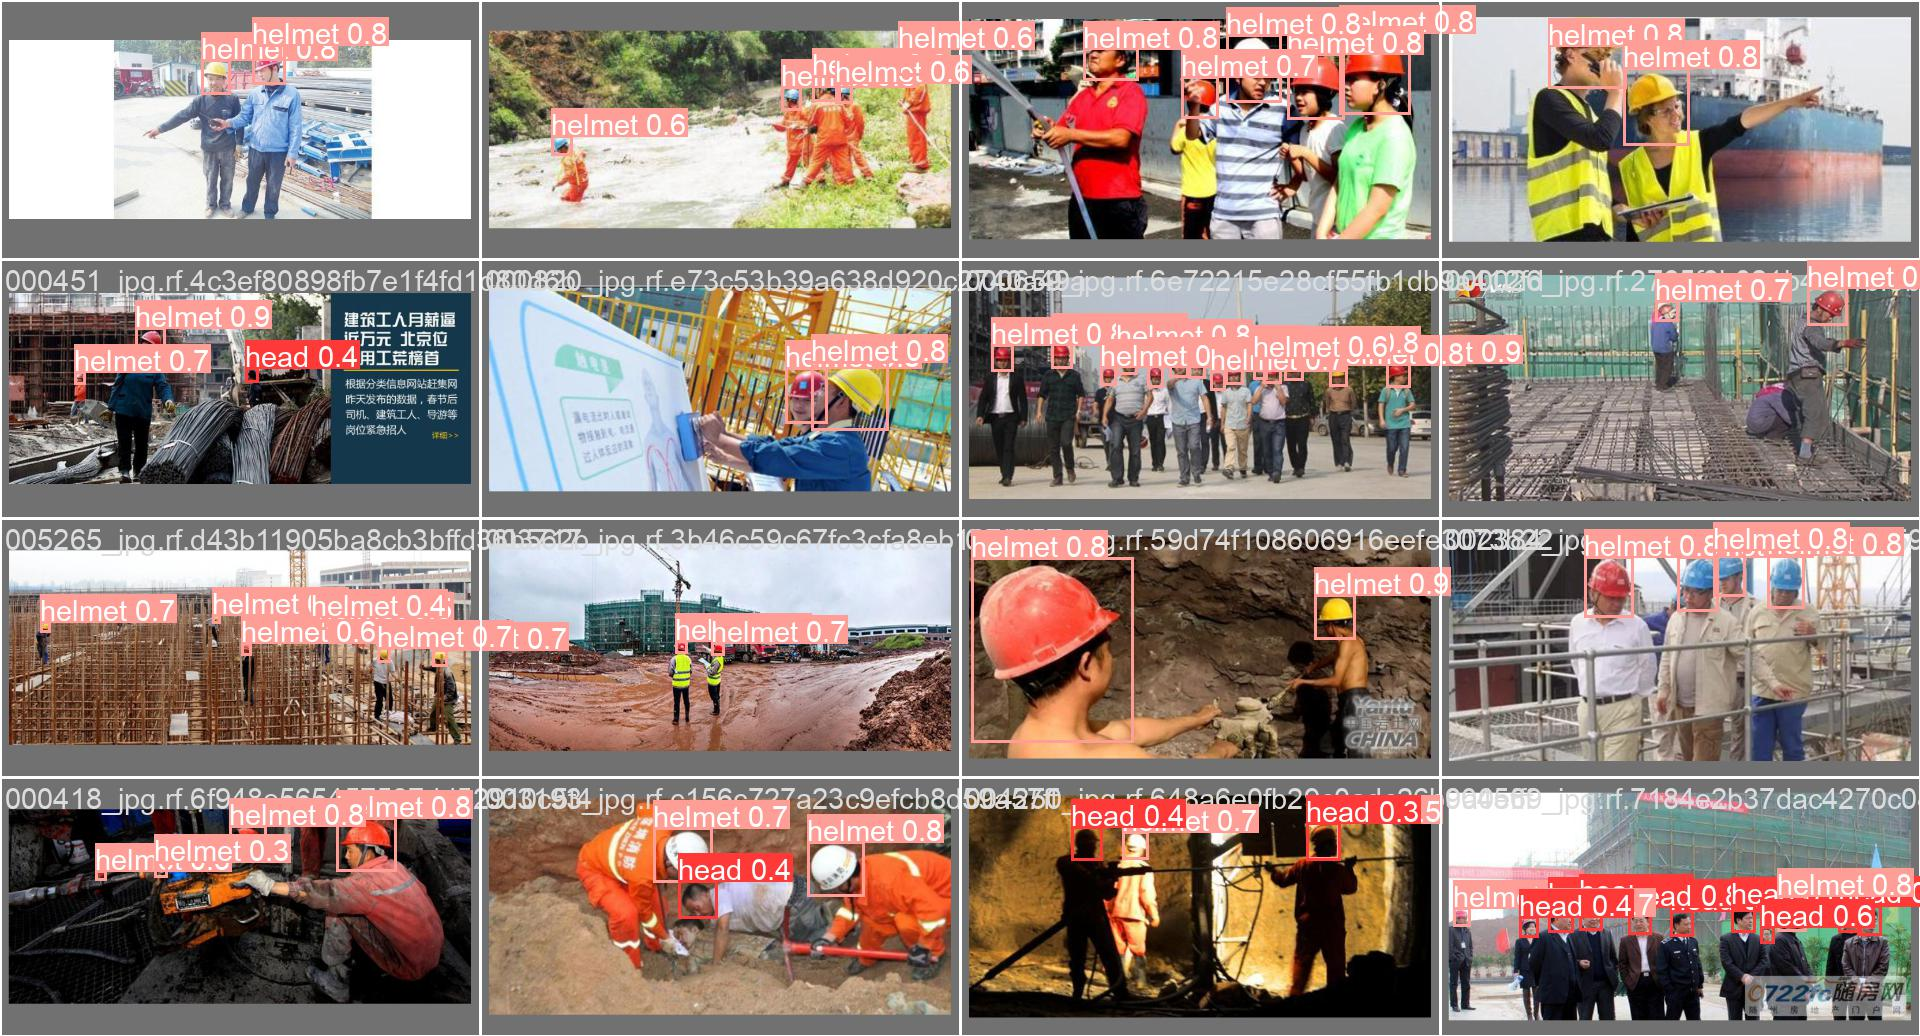

In [ ]:

%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/val_batch0_pred.jpg', width=600)

In [ ]:
### saving the images as per the above
from PIL import Image
%cd {HOME}

# Save the image
image_path = f'{HOME}/runs/detect/train/val_batch0_pred.jpg'
Image(filename=image_path).save(image_path)

### Validate Custom Model

In [ ]:
%cd {HOME}

!yolo task=detect mode=val model={HOME}/runs/detect/train3/weights/best.pt data={dataset.location}/data.yaml

/content
2023-06-08 11:14:17.283015: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-06-08 11:14:18.582386: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Ultralytics YOLOv8.0.20 🚀 Python-3.10.11 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11126745 parameters, 0 gradients, 28.4 GFLOPs
val: Scanning /content/datasets/Hard-Hat-Workers-2/train/labels.cache... 5269 images, 0 backgrounds, 0 corrupt: 100% 5269/5269 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 330/330 [01:28<00:00,  3.75it/s]
                   all       5269      20231      0.875      0.858      0.893      0.676
                  head    

### Inference with Custom Model

In [ ]:
%cd {HOME}
!yolo task=detect mode=predict model={HOME}/runs/detect/train3/weights/best.pt conf=0.25 source={dataset.location}/test/images save=True

/content
2023-06-08 11:17:50.300743: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-06-08 11:17:51.172018: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Ultralytics YOLOv8.0.20 🚀 Python-3.10.11 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11126745 parameters, 0 gradients, 28.4 GFLOPs
image 1/1766 /content/datasets/Hard-Hat-Workers-2/test/images/005298_jpg.rf.647d148af5d961d8bbc041f172247170.jpg: 544x800 8 helmets, 55.7ms
image 2/1766 /content/datasets/Hard-Hat-Workers-2/test/images/005299_jpg.rf.71165960b763340fddc7e7cd0e448cb5.jpg: 544x800 1 helmet, 17.6ms
image 3/1766 /content/datasets/Hard-Hat-Workers-2/test/images/005300_jpg.rf.1670526983a03ed2ccc2ff28c90e0040

**NOTE:** Let's take a look at few results.

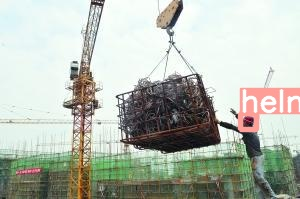

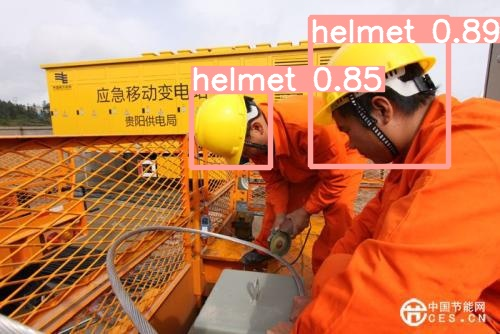

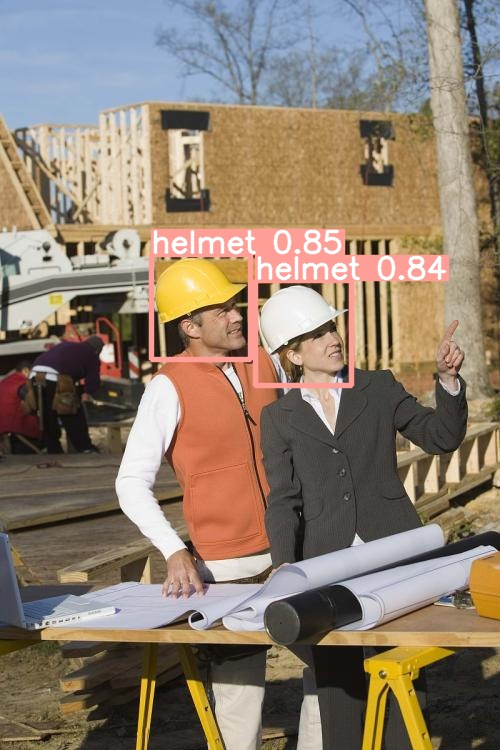

In [ ]:
import glob
from IPython.display import Image, display

for image_path in glob.glob(f'{HOME}/runs/detect/predict/*.jpg')[:3]:
      display(Image(filename=image_path, width=600))
      print("\n")

### Justification of parameters

### Evaluation of model 1 with hyperparameters 4 

# Second Model Evaluation (YOLOv8n)

## Hyperparamter Version 1

### Custom Training



In [ ]:
%cd {HOME}

!yolo task=detect mode=train model=yolov8n.pt data={dataset.location}/data.yaml epochs=2 imgsz=800 plots=True

[Errno 2] No such file or directory: '{HOME}'
/content
/bin/bash: yolo: command not found


In [ ]:
!ls {HOME}/runs/detect/train4/

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train4/confusion_matrix.png', width=600)

In [ ]:
### saving the image of the matrix so that I dont have to run the model again.
import matplotlib.pyplot as plt
%cd {HOME}
# Save the image
plt.savefig('{HOME}/runs/detect/train4/confusion_matrix.png')


In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train4/results.png', width=600)

In [ ]:
### saving the results so I do not have to run the model again
from PIL import Image

%cd {HOME}
# Save the image
image_path = f'{HOME}/runs/detect/train4/results.png'
Image(filename=image_path).save(image_path)

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/val_batch0_pred.jpg', width=600)

In [ ]:
### saving the images as per the above
from PIL import Image
%cd {HOME}

# Save the image
image_path = f'{HOME}/runs/detect/train/val_batch0_pred.jpg'
Image(filename=image_path).save(image_path)

### Validate Custom Model

In [ ]:
%cd {HOME}

!yolo task=detect mode=val model={HOME}/runs/detect/train3/weights/best.pt data={dataset.location}/data.yaml

### Inference with custom Model

In [ ]:
%cd {HOME}
!yolo task=detect mode=predict model={HOME}/runs/detect/train3/weights/best.pt conf=0.25 source={dataset.location}/test/images save=True

In [ ]:
import glob
from IPython.display import Image, display

for image_path in glob.glob(f'{HOME}/runs/detect/predict/*.jpg')[:3]:
      display(Image(filename=image_path, width=600))
      print("\n")

### Justification of parameters

### Evaluation of model 2 with hyperparamters 1

## Hyperparamter Version 2

### Custom Training



In [ ]:
%cd {HOME}

!yolo task=detect mode=train model=yolov8n.pt data={dataset.location}/data.yaml epochs=2 imgsz=800 plots=True

[Errno 2] No such file or directory: '{HOME}'
/content
/bin/bash: yolo: command not found


In [ ]:
!ls {HOME}/runs/detect/train4/

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train4/confusion_matrix.png', width=600)

In [ ]:
### saving the image of the matrix so that I dont have to run the model again.
import matplotlib.pyplot as plt
%cd {HOME}
# Save the image
plt.savefig('{HOME}/runs/detect/train4/confusion_matrix.png')

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train4/results.png', width=600)

In [ ]:
### saving the results so I do not have to run the model again
from PIL import Image

%cd {HOME}
# Save the image
image_path = f'{HOME}/runs/detect/train4/results.png'
Image(filename=image_path).save(image_path)

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/val_batch0_pred.jpg', width=600)

In [ ]:
### saving the images as per the above
from PIL import Image
%cd {HOME}

# Save the image
image_path = f'{HOME}/runs/detect/train/val_batch0_pred.jpg'
Image(filename=image_path).save(image_path)

### Validate Custom Model

In [ ]:
%cd {HOME}

!yolo task=detect mode=val model={HOME}/runs/detect/train3/weights/best.pt data={dataset.location}/data.yaml

### Inference with custom Model

In [ ]:
%cd {HOME}
!yolo task=detect mode=predict model={HOME}/runs/detect/train3/weights/best.pt conf=0.25 source={dataset.location}/test/images save=True

In [ ]:
import glob
from IPython.display import Image, display

for image_path in glob.glob(f'{HOME}/runs/detect/predict/*.jpg')[:3]:
      display(Image(filename=image_path, width=600))
      print("\n")

### Justification of parameters

### Evaluation of model 2 with hyperparameters 2

## Hyperparamter Version 3

### Custom Training



In [ ]:
%cd {HOME}

!yolo task=detect mode=train model=yolov8n.pt data={dataset.location}/data.yaml epochs=2 imgsz=800 plots=True

[Errno 2] No such file or directory: '{HOME}'
/content
/bin/bash: yolo: command not found


In [ ]:
!ls {HOME}/runs/detect/train4/

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train4/confusion_matrix.png', width=600)

In [ ]:
### saving the image of the matrix so that I dont have to run the model again.
import matplotlib.pyplot as plt
%cd {HOME}
# Save the image
plt.savefig('{HOME}/runs/detect/train4/confusion_matrix.png')

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train4/results.png', width=600)

In [ ]:
### saving the results so I do not have to run the model again
from PIL import Image

%cd {HOME}
# Save the image
image_path = f'{HOME}/runs/detect/train4/results.png'
Image(filename=image_path).save(image_path)

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/val_batch0_pred.jpg', width=600)

In [ ]:
### saving the images as per the above
from PIL import Image
%cd {HOME}

# Save the image
image_path = f'{HOME}/runs/detect/train/val_batch0_pred.jpg'
Image(filename=image_path).save(image_path)

### Validate Custom Model

In [ ]:
%cd {HOME}

!yolo task=detect mode=val model={HOME}/runs/detect/train3/weights/best.pt data={dataset.location}/data.yaml

### Inference with custom Model

In [ ]:
%cd {HOME}
!yolo task=detect mode=predict model={HOME}/runs/detect/train3/weights/best.pt conf=0.25 source={dataset.location}/test/images save=True

In [ ]:
import glob
from IPython.display import Image, display

for image_path in glob.glob(f'{HOME}/runs/detect/predict/*.jpg')[:3]:
      display(Image(filename=image_path, width=600))
      print("\n")

### Justification of parameters

### Evaluation of model 2 with hyperparameters 3

## Hyperparamter Version 4

### Custom Training



In [ ]:
%cd {HOME}

!yolo task=detect mode=train model=yolov8n.pt data={dataset.location}/data.yaml epochs=2 imgsz=800 plots=True

[Errno 2] No such file or directory: '{HOME}'
/content
/bin/bash: yolo: command not found


In [ ]:
!ls {HOME}/runs/detect/train4/

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train4/confusion_matrix.png', width=600)

In [ ]:
### saving the image of the matrix so that I dont have to run the model again.
import matplotlib.pyplot as plt
%cd {HOME}
# Save the image
plt.savefig('{HOME}/runs/detect/train4/confusion_matrix.png')

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train4/results.png', width=600)

In [ ]:
### saving the results so I do not have to run the model again
from PIL import Image

%cd {HOME}
# Save the image
image_path = f'{HOME}/runs/detect/train4/results.png'
Image(filename=image_path).save(image_path)

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/val_batch0_pred.jpg', width=600)

In [ ]:
### saving the images as per the above
from PIL import Image
%cd {HOME}

# Save the image
image_path = f'{HOME}/runs/detect/train/val_batch0_pred.jpg'
Image(filename=image_path).save(image_path)

### Validate Custom Model

In [ ]:
%cd {HOME}

!yolo task=detect mode=val model={HOME}/runs/detect/train3/weights/best.pt data={dataset.location}/data.yaml

### Inference with custom Model

In [ ]:
%cd {HOME}
!yolo task=detect mode=predict model={HOME}/runs/detect/train3/weights/best.pt conf=0.25 source={dataset.location}/test/images save=True

In [ ]:
import glob
from IPython.display import Image, display

for image_path in glob.glob(f'{HOME}/runs/detect/predict/*.jpg')[:3]:
      display(Image(filename=image_path, width=600))
      print("\n")

### Justification of parameters

### Evaluation of model 2 with hyperparameters 4

# Third Model Evaluation (YOLOv8m.pt)

## Hyperparameter 1 

### Custom Training

In [ ]:
%cd {HOME}

!yolo task=detect mode=train model=yolov8m.pt data={dataset.location}/data.yaml epochs=2 imgsz=800 plots=True

In [ ]:
!ls {HOME}/runs/detect/train4/

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train4/confusion_matrix.png', width=600)

In [ ]:
### saving the image of the matrix so that I dont have to run the model again.
import matplotlib.pyplot as plt
%cd {HOME}
# Save the image
plt.savefig('{HOME}/runs/detect/train4/confusion_matrix.png')

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train4/results.png', width=600)

In [ ]:
### saving the results so I do not have to run the model again
from PIL import Image

%cd {HOME}
# Save the image
image_path = f'{HOME}/runs/detect/train4/results.png'
Image(filename=image_path).save(image_path)


In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/val_batch0_pred.jpg', width=600)

In [ ]:

### saving the images as per the above
from PIL import Image
%cd {HOME}

# Save the image
image_path = f'{HOME}/runs/detect/train/val_batch0_pred.jpg'
Image(filename=image_path).save(image_path)

### Validate Custom Model

In [ ]:
%cd {HOME}

!yolo task=detect mode=val model={HOME}/runs/detect/train3/weights/best.pt data={dataset.location}/data.yaml

### Inference with custom Model

In [ ]:
%cd {HOME}
!yolo task=detect mode=predict model={HOME}/runs/detect/train3/weights/best.pt conf=0.25 source={dataset.location}/test/images save=True

In [ ]:
import glob
from IPython.display import Image, display

for image_path in glob.glob(f'{HOME}/runs/detect/predict/*.jpg')[:3]:
      display(Image(filename=image_path, width=600))
      print("\n")

### Justification of parameters

### Evaluation of model 3 with hyperparameters 1

## Hyperparameter 2 

### Custom Training

In [ ]:
%cd {HOME}

!yolo task=detect mode=train model=yolov8m.pt data={dataset.location}/data.yaml epochs=2 imgsz=800 plots=True

In [ ]:
!ls {HOME}/runs/detect/train4/

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train4/confusion_matrix.png', width=600)

In [ ]:
### saving the image of the matrix so that I dont have to run the model again.
import matplotlib.pyplot as plt
%cd {HOME}
# Save the image
plt.savefig('{HOME}/runs/detect/train4/confusion_matrix.png')

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train4/results.png', width=600)

In [ ]:
### saving the results so I do not have to run the model again
from PIL import Image

%cd {HOME}
# Save the image
image_path = f'{HOME}/runs/detect/train4/results.png'
Image(filename=image_path).save(image_path)

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/val_batch0_pred.jpg', width=600)

In [ ]:

### saving the images as per the above
from PIL import Image
%cd {HOME}

# Save the image
image_path = f'{HOME}/runs/detect/train/val_batch0_pred.jpg'
Image(filename=image_path).save(image_path)

### Validate Custom Model

In [ ]:
%cd {HOME}

!yolo task=detect mode=val model={HOME}/runs/detect/train3/weights/best.pt data={dataset.location}/data.yaml

### Inference with custom Model

In [ ]:
%cd {HOME}
!yolo task=detect mode=predict model={HOME}/runs/detect/train3/weights/best.pt conf=0.25 source={dataset.location}/test/images save=True

In [ ]:
import glob
from IPython.display import Image, display

for image_path in glob.glob(f'{HOME}/runs/detect/predict/*.jpg')[:3]:
      display(Image(filename=image_path, width=600))
      print("\n")

### Justification of parameters

### Evaluation of model 3 with hyperparameters 2

## Hyperparameter 3

### Custom Training

In [ ]:
%cd {HOME}

!yolo task=detect mode=train model=yolov8m.pt data={dataset.location}/data.yaml epochs=2 imgsz=800 plots=True

In [ ]:
!ls {HOME}/runs/detect/train4/

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train4/confusion_matrix.png', width=600)

In [ ]:
### saving the image of the matrix so that I dont have to run the model again.
import matplotlib.pyplot as plt
%cd {HOME}
# Save the image
plt.savefig('{HOME}/runs/detect/train4/confusion_matrix.png')

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train4/results.png', width=600)

In [ ]:
### saving the results so I do not have to run the model again
from PIL import Image

%cd {HOME}
# Save the image
image_path = f'{HOME}/runs/detect/train4/results.png'
Image(filename=image_path).save(image_path)

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/val_batch0_pred.jpg', width=600)

In [ ]:
### saving the images as per the above
from PIL import Image
%cd {HOME}

# Save the image
image_path = f'{HOME}/runs/detect/train/val_batch0_pred.jpg'
Image(filename=image_path).save(image_path)


### Validate Custom Model

In [ ]:
%cd {HOME}

!yolo task=detect mode=val model={HOME}/runs/detect/train3/weights/best.pt data={dataset.location}/data.yaml

### Inference with custom Model

In [ ]:
%cd {HOME}
!yolo task=detect mode=predict model={HOME}/runs/detect/train3/weights/best.pt conf=0.25 source={dataset.location}/test/images save=True

In [ ]:
import glob
from IPython.display import Image, display

for image_path in glob.glob(f'{HOME}/runs/detect/predict/*.jpg')[:3]:
      display(Image(filename=image_path, width=600))
      print("\n")

### Justification of parameters

### Evaluation of model 3 with hyperparameters 3

## Hyperparameter 4 

### Custom Training

In [ ]:
%cd {HOME}

!yolo task=detect mode=train model=yolov8m.pt data={dataset.location}/data.yaml epochs=2 imgsz=800 plots=True

In [ ]:
!ls {HOME}/runs/detect/train4/

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train4/confusion_matrix.png', width=600)

In [ ]:
### saving the image of the matrix so that I dont have to run the model again.
import matplotlib.pyplot as plt
%cd {HOME}
# Save the image
plt.savefig('{HOME}/runs/detect/train4/confusion_matrix.png')

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train4/results.png', width=600)

In [ ]:
### saving the results so I do not have to run the model again
from PIL import Image

%cd {HOME}
# Save the image
image_path = f'{HOME}/runs/detect/train4/results.png'
Image(filename=image_path).save(image_path)


In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/val_batch0_pred.jpg', width=600)

In [ ]:
### saving the images as per the above
from PIL import Image
%cd {HOME}

# Save the image
image_path = f'{HOME}/runs/detect/train/val_batch0_pred.jpg'
Image(filename=image_path).save(image_path)


### Validate Custom Model

In [ ]:
%cd {HOME}

!yolo task=detect mode=val model={HOME}/runs/detect/train3/weights/best.pt data={dataset.location}/data.yaml

### Inference with custom Model

In [ ]:
%cd {HOME}
!yolo task=detect mode=predict model={HOME}/runs/detect/train3/weights/best.pt conf=0.25 source={dataset.location}/test/images save=True

In [ ]:
import glob
from IPython.display import Image, display

for image_path in glob.glob(f'{HOME}/runs/detect/predict/*.jpg')[:3]:
      display(Image(filename=image_path, width=600))
      print("\n")

### Justification of parameters

### Evaluation of model 3 with hyperparameters 4

# Fourth Model Evaluation (YOLOV8x.pt)

## Hyperparamter 1

### Custom Training

In [ ]:
%cd {HOME}

!yolo task=detect mode=train model=yolov8x.pt data={dataset.location}/data.yaml epochs=2 imgsz=800 plots=True

In [ ]:
!ls {HOME}/runs/detect/train4/

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train4/confusion_matrix.png', width=600)

In [ ]:
### saving the image of the matrix so that I dont have to run the model again.
import matplotlib.pyplot as plt
%cd {HOME}
# Save the image
plt.savefig('{HOME}/runs/detect/train4/confusion_matrix.png')

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train4/results.png', width=600)

In [ ]:
### saving the results so I do not have to run the model again
from PIL import Image

%cd {HOME}
# Save the image
image_path = f'{HOME}/runs/detect/train4/results.png'
Image(filename=image_path).save(image_path)

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/val_batch0_pred.jpg', width=600)

In [ ]:
### saving the images as per the above
from PIL import Image
%cd {HOME}

# Save the image
image_path = f'{HOME}/runs/detect/train/val_batch0_pred.jpg'
Image(filename=image_path).save(image_path)


### Validate Custom Model

In [ ]:
%cd {HOME}

!yolo task=detect mode=val model={HOME}/runs/detect/train3/weights/best.pt data={dataset.location}/data.yaml

### Inference with custom Model

In [ ]:
%cd {HOME}
!yolo task=detect mode=predict model={HOME}/runs/detect/train3/weights/best.pt conf=0.25 source={dataset.location}/test/images save=True

In [ ]:
import glob
from IPython.display import Image, display

for image_path in glob.glob(f'{HOME}/runs/detect/predict/*.jpg')[:3]:
      display(Image(filename=image_path, width=600))
      print("\n")

### Justification of parameters

### Evaluation of model 4 with hyperparamters 1

## Hyperparamter 2

### Custom Training

In [ ]:
%cd {HOME}

!yolo task=detect mode=train model=yolov8x.pt data={dataset.location}/data.yaml epochs=2 imgsz=800 plots=True

In [ ]:
!ls {HOME}/runs/detect/train4/

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train4/confusion_matrix.png', width=600)

In [ ]:
### saving the image of the matrix so that I dont have to run the model again.
import matplotlib.pyplot as plt
%cd {HOME}
# Save the image
plt.savefig('{HOME}/runs/detect/train4/confusion_matrix.png')


In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train4/results.png', width=600)

In [ ]:
### saving the results so I do not have to run the model again
from PIL import Image

%cd {HOME}
# Save the image
image_path = f'{HOME}/runs/detect/train4/results.png'
Image(filename=image_path).save(image_path)


In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/val_batch0_pred.jpg', width=600)

In [ ]:
### saving the images as per the above
from PIL import Image
%cd {HOME}

# Save the image
image_path = f'{HOME}/runs/detect/train/val_batch0_pred.jpg'
Image(filename=image_path).save(image_path)


### Validate Custom Model

In [ ]:
%cd {HOME}

!yolo task=detect mode=val model={HOME}/runs/detect/train3/weights/best.pt data={dataset.location}/data.yaml

### Inference with custom Model

In [ ]:
%cd {HOME}
!yolo task=detect mode=predict model={HOME}/runs/detect/train3/weights/best.pt conf=0.25 source={dataset.location}/test/images save=True

[Errno 2] No such file or directory: '{HOME}'
/content
/bin/bash: yolo: command not found


In [ ]:
import glob
from IPython.display import Image, display

for image_path in glob.glob(f'{HOME}/runs/detect/predict/*.jpg')[:3]:
      display(Image(filename=image_path, width=600))
      print("\n")

NameError: ignored

### Justification of parameters

### Evaluation of model 4 with hyperparameters 2

## Hyperparamter 3

### Custom Training

In [ ]:
%cd {HOME}

!yolo task=detect mode=train model=yolov8x.pt data={dataset.location}/data.yaml epochs=2 imgsz=800 plots=True

In [ ]:
!ls {HOME}/runs/detect/train4/

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train4/confusion_matrix.png', width=600)

In [ ]:
### saving the image of the matrix so that I dont have to run the model again.
import matplotlib.pyplot as plt
%cd {HOME}
# Save the image
plt.savefig('{HOME}/runs/detect/train4/confusion_matrix.png')


In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train4/results.png', width=600)

In [ ]:
### saving the results so I do not have to run the model again
from PIL import Image

%cd {HOME}
# Save the image
image_path = f'{HOME}/runs/detect/train4/results.png'
Image(filename=image_path).save(image_path)

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/val_batch0_pred.jpg', width=600)

In [ ]:
### saving the images as per the above
from PIL import Image
%cd {HOME}

# Save the image
image_path = f'{HOME}/runs/detect/train/val_batch0_pred.jpg'
Image(filename=image_path).save(image_path)

### Validate Custom Model

In [ ]:
%cd {HOME}

!yolo task=detect mode=val model={HOME}/runs/detect/train3/weights/best.pt data={dataset.location}/data.yaml

### Inference with custom Model

In [ ]:
%cd {HOME}
!yolo task=detect mode=predict model={HOME}/runs/detect/train3/weights/best.pt conf=0.25 source={dataset.location}/test/images save=True

In [ ]:
import glob
from IPython.display import Image, display

for image_path in glob.glob(f'{HOME}/runs/detect/predict/*.jpg')[:3]:
      display(Image(filename=image_path, width=600))
      print("\n")

### Justification of parameters

### Evaluation of model 4 with hyperparameters 3

## Hyperparamter 4

### Custom Training

In [ ]:
%cd {HOME}

!yolo task=detect mode=train model=yolov8x.pt data={dataset.location}/data.yaml epochs=2 imgsz=800 plots=True

In [ ]:
!ls {HOME}/runs/detect/train4/

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train4/confusion_matrix.png', width=600)

In [ ]:
### saving the image of the matrix so that I dont have to run the model again.
import matplotlib.pyplot as plt
%cd {HOME}
# Save the image
plt.savefig('{HOME}/runs/detect/train4/confusion_matrix.png')


In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train4/results.png', width=600)

In [ ]:
### saving the results so I do not have to run the model again
from PIL import Image

%cd {HOME}
# Save the image
image_path = f'{HOME}/runs/detect/train4/results.png'
Image(filename=image_path).save(image_path)

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/val_batch0_pred.jpg', width=600)

In [ ]:
### saving the images as per the above
from PIL import Image
%cd {HOME}

# Save the image
image_path = f'{HOME}/runs/detect/train/val_batch0_pred.jpg'
Image(filename=image_path).save(image_path)

### Validate Custom Model

In [ ]:
%cd {HOME}

!yolo task=detect mode=val model={HOME}/runs/detect/train3/weights/best.pt data={dataset.location}/data.yaml

### Inference with custom Model

In [ ]:
%cd {HOME}
!yolo task=detect mode=predict model={HOME}/runs/detect/train3/weights/best.pt conf=0.25 source={dataset.location}/test/images save=True

In [ ]:
import glob
from IPython.display import Image, display

for image_path in glob.glob(f'{HOME}/runs/detect/predict/*.jpg')[:3]:
      display(Image(filename=image_path, width=600))
      print("\n")

### Justification of parameters

### Evaluation of model 4 with hyperparameters 4

# Neural Network Result Comparison 